#Содержание


* 1 Загрузка файла с данными и изучение общей информации
* 2 Анализ данных
* 3 Предобработка данных
 * 3.1 Check GAP
 * 3.2 Check NaN
 * 3.3 Фильтрация аномальных значений
* Проверка
* 4 Анализ факторов влияющих на общую стоимость объекта
* 5 Анализ средней цены одного квадратного метра в 10 населённых пунктах
* 6 Анализ изменения средней цены каждого километра от центра Санкт-Петербурга



<div style="border:2px solid Black; padding:20px;">
<h1>Исследование объявлений о продаже квартир</h1>

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Необходимо выполнить:
1. Первичный анализ исходных данных;
2. Предобработку данных;
3. Добавить в таблицу новые столбцы с параметрами;
4. Провести исследовательский анализ данных;
5. Написать общий вывод.
</div>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

# Загрузим файл с данными и изучаем общую информацию

In [ ]:
data =pd.read_csv('datasets/real_estate_data.csv', sep = '\t')

print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


## Проанализируем данные при помощи отображения графиков

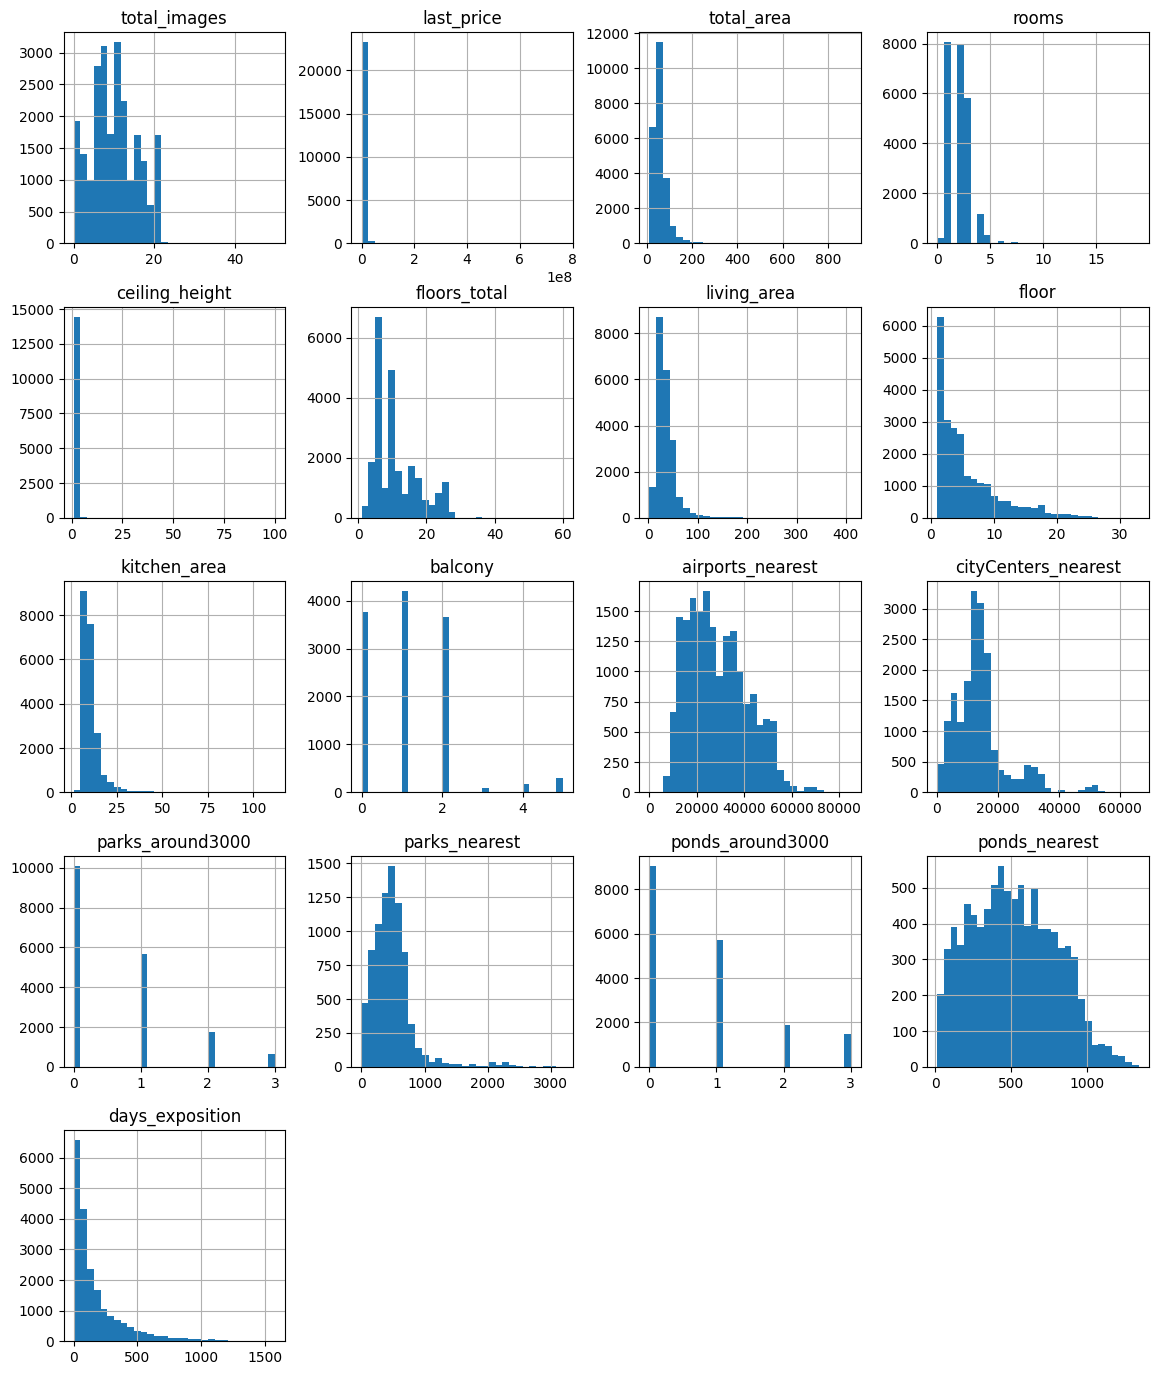

In [ ]:
data.hist(bins = 30, figsize= (14, 17));

* Изучив исходные данные можно отметить, что кол-во параметров представленных в таблице составляет - 21, а кол-во записей для каждого -  23699 строк. Можно сделать вывод , что для анализа предсталена хорошая выборка данных с большим кол-вом данных.

### Предобработка данных

In [ ]:
data.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

В таблице выше приведены параметры с пропущенными значениями по возрастанию , больше всего пропусков в столбцах:

+ living_area =           1903

+ kitchen_area =             2278

- days_exposition =          3181

+ ponds_around3000 =         5518

+ parks_around3000 =         5518

- cityCenters_nearest =      5519

- airports_nearest =         5542

+ ceiling_height =           9195

+ balcony =                 11519

- ponds_nearest =           14589

- parks_nearest =           15620

+ is_apartment =            20924


Построим график пропущенных значений в столбцах таблицы

In [ ]:
def pass_value(df):
    try:
        (
            (df.isna().sum())
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = False)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = True, fontsize = 16)
            .set_title('Количество пропусков ' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось или произошла ошибка в первой части функции ')

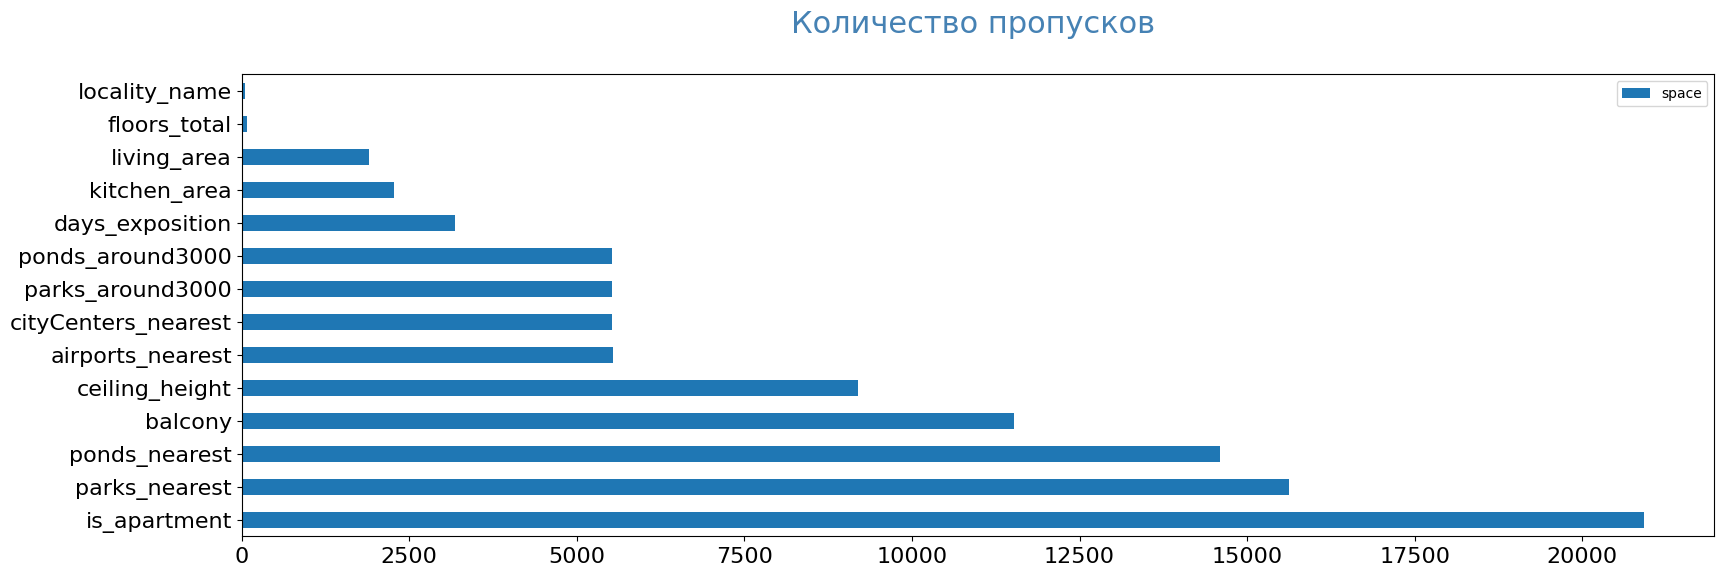

In [ ]:
pass_value(data)

Проведём проверку на корректность исходных значений наших площадей


In [ ]:
data[['total_area','living_area','kitchen_area']].query('total_area*0.9 <= (living_area + kitchen_area)')

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


In [ ]:
data['kitchen_area'].fillna(value = data['kitchen_area'].median(), inplace=True)
data['living_area'].fillna(value = data['living_area'].median(), inplace=True)

После заполнения синтетическими данными столбцов, проводим проверку на корректность значений всех наших площадей.

In [ ]:
data[['total_area','living_area','kitchen_area']].query('total_area*0.9 <= (living_area + kitchen_area)')

,total_area,living_area,kitchen_area
30,32.8,30.0,9.1
41,74.0,59.0,12.0
44,40.0,30.0,9.1
60,35.0,30.0,9.1
133,31.0,30.0,9.1
...,...,...,...
23601,43.4,30.0,9.1
23632,38.0,30.0,9.1
23637,26.0,17.0,9.1
23679,35.0,30.0,9.1


* Выбранный алгоритм заполнения пропущеных жилой площади и площади кухни, через медианное значение приводит к
увеличению количества появления аномалий с 475 до 1445 (на 970 шт) . Найденные 475 случая аномалий относятся к первичным данным из таблице, а  к синтетическим данным полученных за счет медианых значений относиться - 970 шт.
В любом случае стоит подумать над тем как с этим бороться - возможным решением будет удалить такие значения т.к.
если их количество составляет менее 5 % от общего кол-ва строк и их удаление не повлияет на итоговые выводы. Но в нашем случае удаление критично, поэтому можем их оставить, при этом отметив, что около 5 % данных отражают не совсем корректные значения по площади.

Загружаем исходные данные снова и обрабатываем пропуски

In [ ]:
data =pd.read_csv('datasets/real_estate_data.csv', sep = '\t')

data['balcony'].fillna(value = '0', inplace=True)
data['ceiling_height'].fillna(value = 2.5, inplace=True)
data['ponds_around3000'].fillna(value = '0.0', inplace=True)
data['parks_around3000'].fillna(value = '0.0', inplace=True)
data['is_apartment'].fillna(value = False, inplace=True)
data['kitchen_area'].fillna(value = data['kitchen_area'].median(), inplace=True)
data['living_area'].fillna(value = data['living_area'].median(), inplace=True)

Количество пропусков в floors_total минимальное , на статистику не влияет, следовательно его можно удалить для возможности в дальнейшем перевести в тип int

In [ ]:
data = data.dropna(subset = ['floors_total'])

In [ ]:
data.isnull().sum().sort_values()

total_images                0
ponds_around3000            0
parks_around3000            0
balcony                     0
kitchen_area                0
open_plan                   0
is_apartment                0
floor                       0
studio                      0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
living_area                 0
locality_name              48
days_exposition          3172
cityCenters_nearest      5509
airports_nearest         5532
ponds_nearest           14552
parks_nearest           15568
dtype: int64

В процессе предобработке данных были выявлены параметры с пропусками, далее они были проранжированы по их количеству. Далее был выполнен их анализ на предмет возможности заполнения данных пропусков, по части параметров такая замена видится вполнене приемлемым решением в текущей ситуации, по части параметров было принято решение воздержаться от замены пропусков во избежание внесения некорректных данных и как следсвие получение неверных выводов по анализу в целом.Часть пропущенных значений были заполнены там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Где логичную замену предложить было невозможно, то данные значения остались пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.

Касательно возможных причин пропусков то ими могут быть как нежелание респрондентов заполнять все поля анкеты, либо непонимания того, что от них требуется. Например, вопрос "это апартмент?" вызвал много вопрос, что считать за апртмент, а что нет, для людей не посвященных этот  относительного новый тип жилью большинству не известен. Вторая причина почему остались поля незаполненными может быть незнание расстояния до аэропорта или ближайшего парка , поэтому такая информация также не заполнялась и тд.  


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  object 
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

После изучения данных было выяснено, что часть данных относится к некорректному типу данных, например, следующие колонки:
1. last_price object
2. total_area  object
3. ceiling_height
4. floors_total
5. living_area
6. kitchen_area
7. balcony
8. airports_nearest
9. cityCenters_nearest
10. parks_nearest
11. ponds_nearest
12. days_exposition

Все данные параметры должны быть отнесены к численному типу Int и Float

In [ ]:
data['last_price']= pd.to_numeric(data['last_price'])
data['total_area']= pd.to_numeric(data['total_area'])
data['ceiling_height']= pd.to_numeric(data['ceiling_height'])
data['floors_total']= pd.to_numeric(data['floors_total'])
data['living_area']= pd.to_numeric(data['living_area'])
data['kitchen_area']= pd.to_numeric(data['kitchen_area'])
data['balcony']= pd.to_numeric(data['balcony'])
data['airports_nearest']= pd.to_numeric(data['airports_nearest'])
data['cityCenters_nearest']= pd.to_numeric(data['cityCenters_nearest'])
data['parks_nearest']= pd.to_numeric(data['parks_nearest'])
data['ponds_nearest']= pd.to_numeric(data['ponds_nearest'])
data['days_exposition']= pd.to_numeric(data['days_exposition'])
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**УСТРАНЕНИЕ ДУБЛИКАТОВ**

In [ ]:
list(data['locality_name'].unique())

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [ ]:
Replace_dict = {
    'поселок городского типа':'' ,
    'посёлок городского типа':'',
    'коттеджный поселок':'',
    'коттеджный посёлок':'',
    'посёлок станции':'',
    'поселок станции':'',
    'посёлок при железнодорожной станции':'',
    'городской поселок':'',
    'поселок':'' ,
    'городской посёлок':'' ,
    'посёлок':'',
    'деревня':'' ,
    'садовое товарищество':'' ,
    'село':'' ,
    'садоводческое некоммерческое товарищество':''

}

Punctuation_set =',.;()[]\'!\"?'


In [ ]:
def repl_punct(text):
    clean_text = ''
    for letter in text:
        if letter not in Punctuation_set:
            clean_text += letter
    return clean_text

In [ ]:
def apply_repl_dict(text):
    for key,value in Replace_dict.items():
        text = text.replace(key,value)
    return text

In [ ]:
def locality_processing(locality_name):
    #удаление знаков препинания
    locality_name = repl_punct(locality_name)
    #учет регистра
    locality_name = locality_name.lower()
    #замена занчений из словаря
    return apply_repl_dict(locality_name)


In [ ]:
data['locality_name'] = data['locality_name'].fillna('без имени').astype('str')
data['new_locality_name'] = data['locality_name'].apply(locality_processing)
data['new_locality_name']

0        санкт-петербург
1                 шушары
2        санкт-петербург
3        санкт-петербург
4        санкт-петербург
              ...       
23694    санкт-петербург
23695              тосно
23696        рождествено
23697    санкт-петербург
23698        новый учхоз
Name: new_locality_name, Length: 23613, dtype: object

In [ ]:
data.new_locality_name.nunique()

310

In [ ]:
data['ceiling_height'] = data['ceiling_height'].replace(27.5 , 2.75 )
data['ceiling_height'] = data['ceiling_height'].replace(32. , 3.2 )
data['ceiling_height'] = data['ceiling_height'].replace(27. , 2.7 )
data['ceiling_height'] = data['ceiling_height'].replace(26. , 2.6 )
data['ceiling_height'] = data['ceiling_height'].replace(25. , 2.5 )
data['ceiling_height'] = data['ceiling_height'].replace(24. , 2.4 )
data['ceiling_height'] = data['ceiling_height'].replace(22.6 , 2.26 )
data['ceiling_height'] = data['ceiling_height'].replace(35., 3.5 )
data['ceiling_height'] = data['ceiling_height'].replace(28., 2.8 )
data['ceiling_height'] = data['ceiling_height'].replace(31., 3.1 )
data['ceiling_height'] = data['ceiling_height'].replace(30., 3.0 )
data['ceiling_height'] = data['ceiling_height'].replace(42., 4.2 )
data['ceiling_height'] = data['ceiling_height'].replace(50., 5.0 )
data['ceiling_height'] = data['ceiling_height'].replace(23., 2.3 )
data['ceiling_height'] = data['ceiling_height'].replace(22., 2.2 )
data['ceiling_height'] = data['ceiling_height'].replace(39., 3.9 )
data['ceiling_height'] = data['ceiling_height'].replace(29., 2.9 )
data['ceiling_height'] = data['ceiling_height'].replace(37., 3.7 )
data['ceiling_height'] = data['ceiling_height'].replace(21., 2.1 )

data = data.query('2 < ceiling_height < 5')
data['ceiling_height'].unique()

array([2.7 , 2.5 , 3.03, 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 , 2.55,
       3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59,
       2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12,
       2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53,
       2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57,
       2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67,
       3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08,
       3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37,
       2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 2.98,
       2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02, 3.21, 3.43,
       3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 3.42,
       2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.29, 2.

In [ ]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

In [ ]:
data['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [ ]:
data['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [ ]:
data['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [ ]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [ ]:
data['ceiling_height'].unique()

array([2.7 , 2.5 , 3.03, 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 , 2.55,
       3.  , 2.65, 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59,
       2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12,
       2.53, 2.74, 2.96, 2.46, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53,
       2.83, 4.7 , 2.4 , 3.38, 3.01, 3.65, 3.9 , 3.18, 3.35, 2.3 , 3.57,
       2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67,
       3.87, 3.66, 3.85, 3.86, 4.19, 3.24, 4.8 , 4.5 , 4.2 , 3.36, 3.08,
       3.68, 3.07, 3.37, 3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 4.37,
       2.68, 3.22, 3.27, 4.1 , 2.93, 3.46, 3.47, 3.33, 3.63, 3.32, 2.98,
       2.86, 3.17, 4.4 , 3.28, 3.04, 4.45, 3.84, 3.23, 3.02, 3.21, 3.43,
       3.78, 4.3 , 3.39, 2.69, 3.31, 4.65, 3.56, 2.2 , 3.51, 3.93, 3.42,
       2.99, 3.49, 4.14, 2.91, 3.88, 4.25, 3.29, 2.

In [ ]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52.])

In [ ]:
data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [ ]:
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [ ]:
data['is_apartment'].unique()

array([False,  True])

In [ ]:
data['studio'].unique()

array([False,  True])

In [ ]:
data['open_plan'].unique()

array([False,  True])

In [ ]:
data['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,   9.1 ,  41.  ,  14.4 ,  18.9 ,   8.81,
         6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,   5.6 ,
        12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,  11.7 ,
        13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,   7.5 ,
         9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,  16.  ,
         5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,   7.3 ,
        11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,  10.8 ,
        18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,  15.4 ,
         7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,   7.9 ,
        10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,  10.9 ,
         9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,  15.7 ,
        13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,  35.  ,
        10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,   8.9 ,
         9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,  11.2 ,
      

In [ ]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
data['airports_nearest'].unique()

array([18863., 12817., 21741., ..., 11751., 20151., 24665.])

In [ ]:
data['cityCenters_nearest'].unique()

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

In [ ]:
data['parks_around3000'].unique()

array([1.0, 0.0, 2.0, '0.0', 3.0], dtype=object)

In [ ]:
data['ponds_around3000'].unique()

array([2.0, 0.0, 3.0, 1.0, '0.0'], dtype=object)

In [ ]:
data['ponds_nearest'].unique()

array([ 755.,   nan,  574., ...,   40.,   30., 1134.])

In [ ]:
data['days_exposition'].unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

In [ ]:
data['new_locality_name'].unique()

array(['санкт-петербург', ' шушары', ' янино-1', ' парголово', ' мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', ' кудрово',
       'коммунар', 'колпино', ' красный бор', 'гатчина', ' фёдоровское',
       'выборг', 'кронштадт', 'кировск', ' новое девяткино',
       ' металлострой', ' лебяжье', ' сиверский', ' молодцово',
       ' кузьмоловский', ' новая ропша', 'павловск', ' пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       ' куттузи', ' аннино', ' ефимовский', ' плодовое', ' заклинье',
       ' торковичи', ' первомайское', 'красное ', ' понтонный',
       'сясьстрой', ' старая', ' лесколово', ' новый свет', 'сланцы',
       ' путилово', 'ивангород', 'мурино', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', ' оржицы', ' кальтино', 'кудрово',
       ' романовка', ' бугры', ' рощино', 'кириши', 'луга', 'волосово',
       'отрадное', ' павлово', ' оредеж', ' копорье', ' молодёжное',
       'тихвин', ' победа', ' н

После анализа в столбце ceiling_height были выявлены аномальные значения в высоте потолков, там где была опечатка была произведена замена, а там где логичную замену произвести не получилось данные были отфильтрованы.    

#### Check GAP

Изменяем тип данных на целочисленный

In [ ]:
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

<ipython-input-136-94d522ee37bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['balcony'] = data['balcony'].astype('int')
<ipython-input-136-94d522ee37bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_total'] = data['floors_total'].astype('int')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23583 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23583 non-null  int64  
 1   last_price            23583 non-null  float64
 2   total_area            23583 non-null  float64
 3   first_day_exposition  23583 non-null  object 
 4   rooms                 23583 non-null  int64  
 5   ceiling_height        23583 non-null  float64
 6   floors_total          23583 non-null  int64  
 7   living_area           23583 non-null  float64
 8   floor                 23583 non-null  int64  
 9   is_apartment          23583 non-null  bool   
 10  studio                23583 non-null  bool   
 11  open_plan             23583 non-null  bool   
 12  kitchen_area          23583 non-null  float64
 13  balcony               23583 non-null  int64  
 14  locality_name         23583 non-null  object 
 15  airports_nearest   

Показатели о количестве объявлений в датасете, минимальных и максимальных значениях в выбранных параметрах о продаже квартир

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max','median'])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,583.00","23,583.00","23,583.00","20,417.00","23,583.00","23,583.00","23,583.00","23,583.00","23,583.00"
min,0.00,12.00,2.20,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,4.90,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.50,95.00,"4,650,000.00",30.00,9.10,4.00,9.00


#### Сheck NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23583 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23583 non-null  int64  
 1   last_price            23583 non-null  float64
 2   total_area            23583 non-null  float64
 3   first_day_exposition  23583 non-null  object 
 4   rooms                 23583 non-null  int64  
 5   ceiling_height        23583 non-null  float64
 6   floors_total          23583 non-null  int64  
 7   living_area           23583 non-null  float64
 8   floor                 23583 non-null  int64  
 9   is_apartment          23583 non-null  bool   
 10  studio                23583 non-null  bool   
 11  open_plan             23583 non-null  bool   
 12  kitchen_area          23583 non-null  float64
 13  balcony               23583 non-null  int64  
 14  locality_name         23583 non-null  object 
 15  airports_nearest   

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5521
cityCenters_nearest      5498
parks_around3000            0
parks_nearest           15551
ponds_around3000            0
ponds_nearest           14535
days_exposition          3166
new_locality_name           0
dtype: int64

####Фильтрация аномальных значений

In [ ]:
data = data.query('rooms > 0 and rooms < 10')
data = data.query('total_area > 20 and total_area < 250')
data = data.query('ceiling_height > 2.0 and ceiling_height < 5.0')
data = data.query('last_price > 1000000 and last_price < 60000000')
data = data.query('living_area > 10 and living_area < 150')
data = data.query('kitchen_area > 3 and kitchen_area < 30')
data = data.query('floors_total > 0 and floors_total < 30')


data = data.loc[((data['days_exposition'] > 2) & (data['days_exposition'] < 1000)) | (data['days_exposition'].isna() == True)]


###Проверка

In [ ]:
data.shape[0]

22261

In [ ]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,261.00","22,261.00","22,261.00","19,302.00","22,261.00","22,261.00","22,261.00","22,261.00","22,261.00"
min,1.00,20.10,2.20,3.00,"1,010,000.00",10.08,3.20,1.00,1.00
max,9.00,240.00,4.80,999.00,"59,534,892.00",149.40,29.90,27.00,29.00


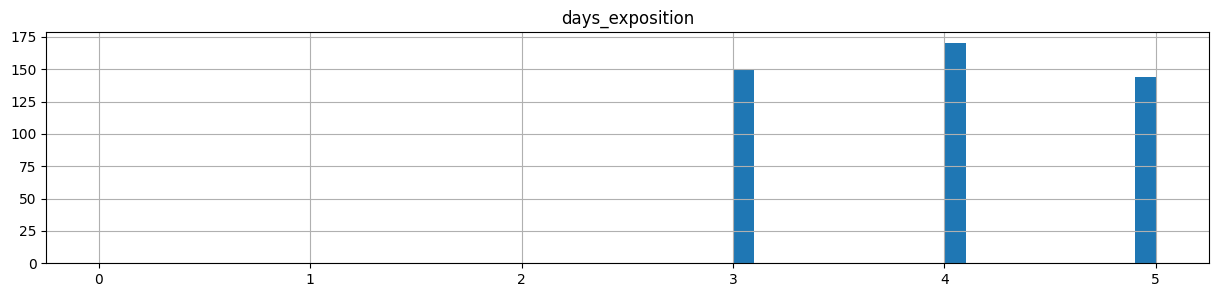

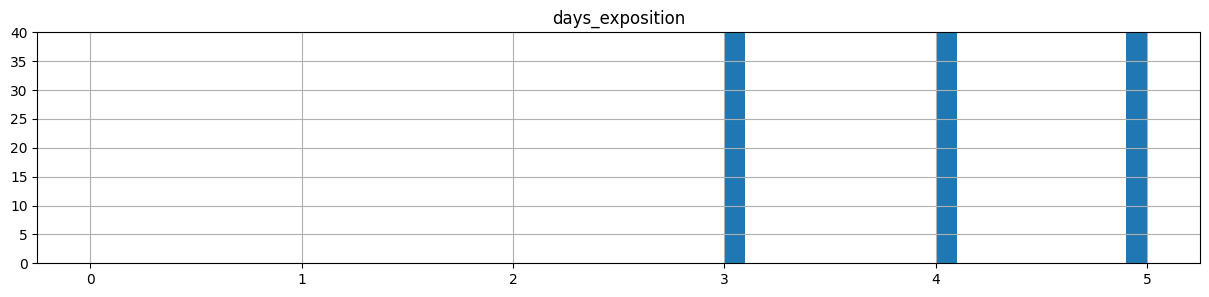

In [ ]:
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

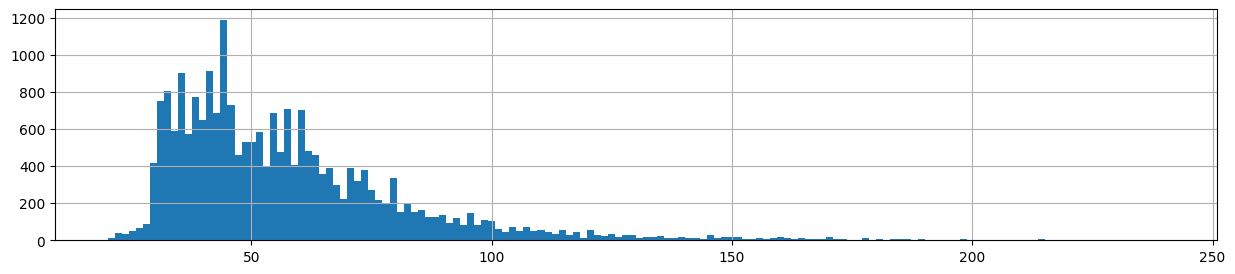

In [ ]:
data.total_area.hist(bins = 150, figsize = (15,3));

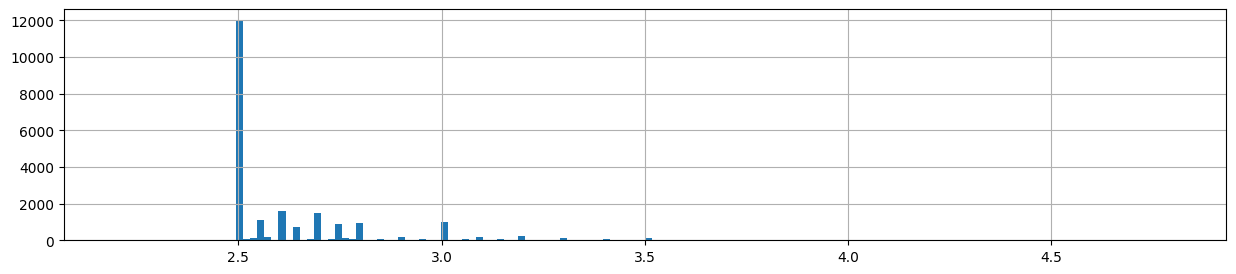

In [ ]:
data.ceiling_height.hist(bins = 150, figsize = (15,3));

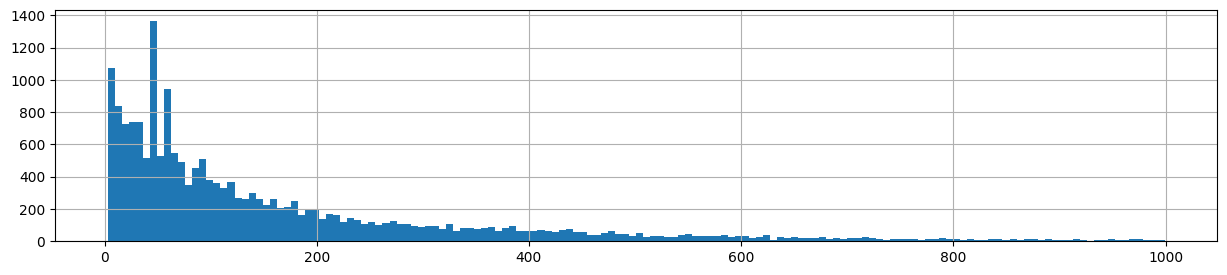

In [ ]:
data.days_exposition.hist(bins = 150, figsize = (15,3));

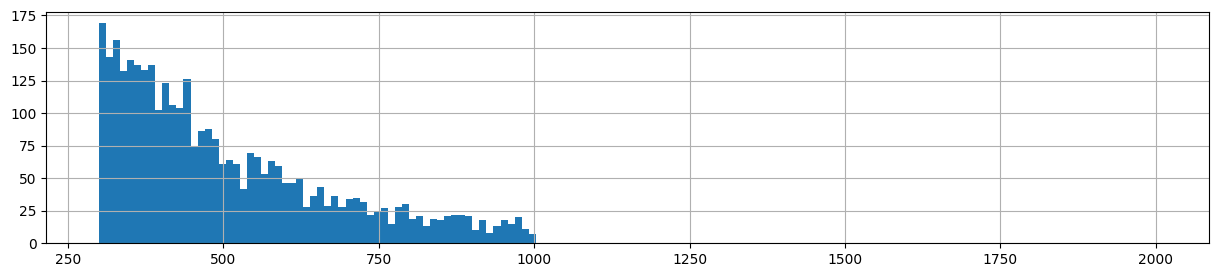

In [ ]:
data.days_exposition.hist(bins = 150, figsize = (15,3), range = (300,2000));

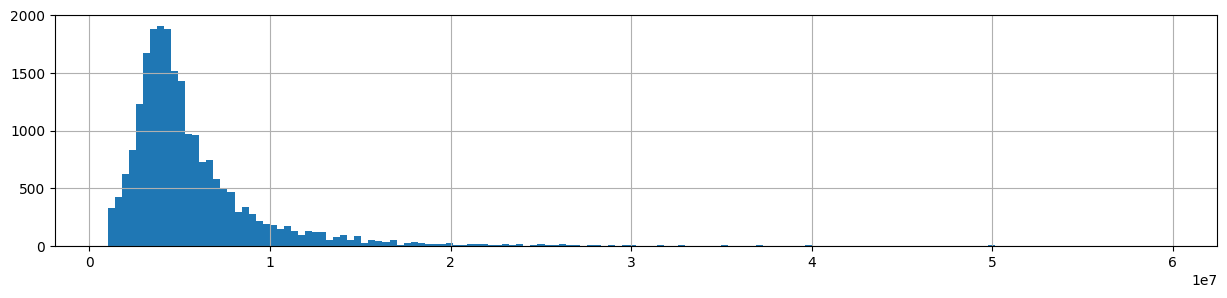

In [ ]:
data.last_price.hist(bins = 150, figsize = (15,3));

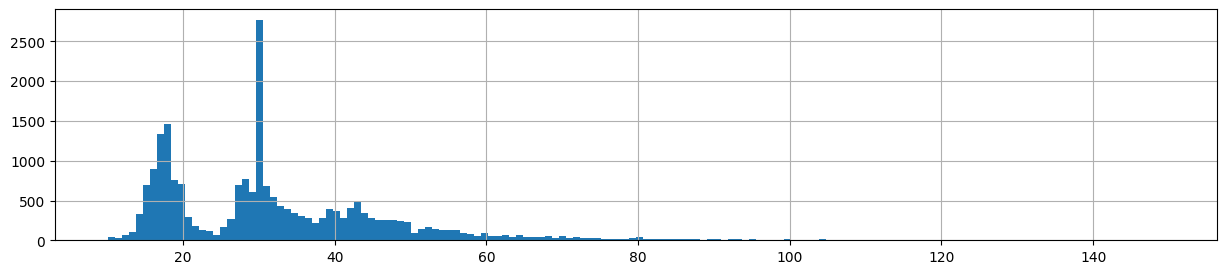

In [ ]:
data.living_area.hist(bins = 150, figsize = (15,3));

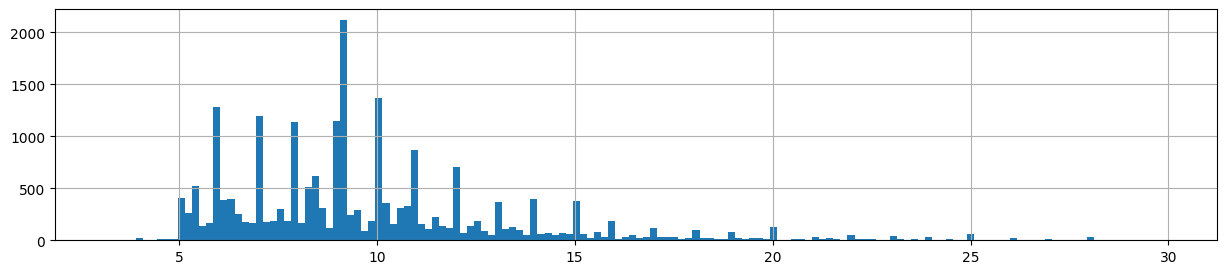

In [ ]:
data.kitchen_area.hist(bins = 150, figsize = (15,3));

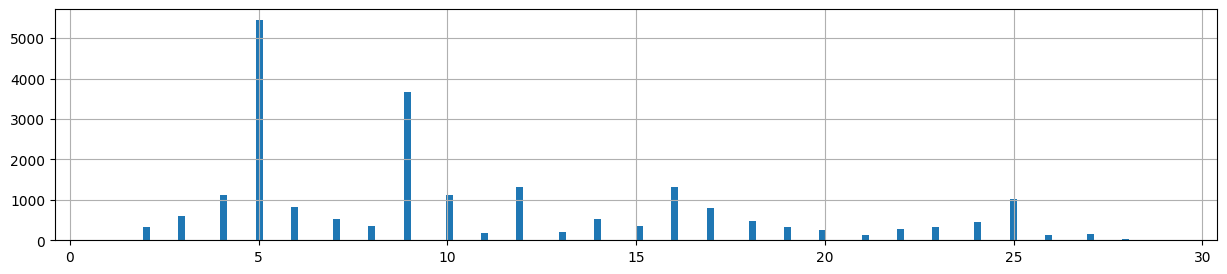

In [ ]:
data.floors_total.hist(bins = 150, figsize = (15,3));

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22261 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22261 non-null  int64  
 1   last_price            22261 non-null  float64
 2   total_area            22261 non-null  float64
 3   first_day_exposition  22261 non-null  object 
 4   rooms                 22261 non-null  int64  
 5   ceiling_height        22261 non-null  float64
 6   floors_total          22261 non-null  int64  
 7   living_area           22261 non-null  float64
 8   floor                 22261 non-null  int64  
 9   is_apartment          22261 non-null  bool   
 10  studio                22261 non-null  bool   
 11  open_plan             22261 non-null  bool   
 12  kitchen_area          22261 non-null  float64
 13  balcony               22261 non-null  int64  
 14  locality_name         22261 non-null  object 
 15  airports_nearest   

In [ ]:
try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


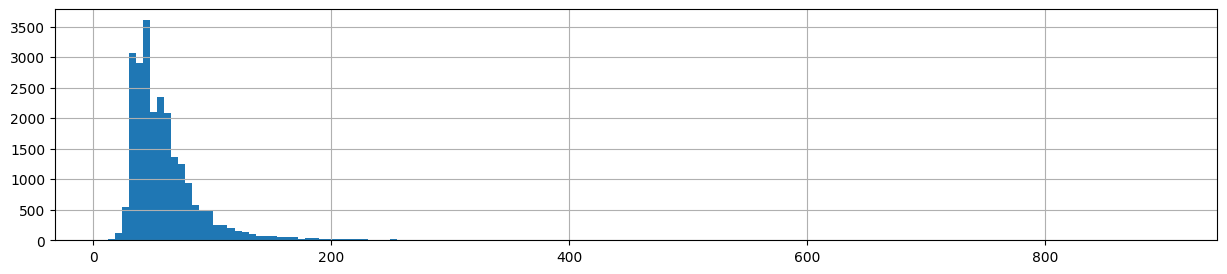

In [ ]:
df_check.total_area.hist(bins = 150, figsize = (15,3));

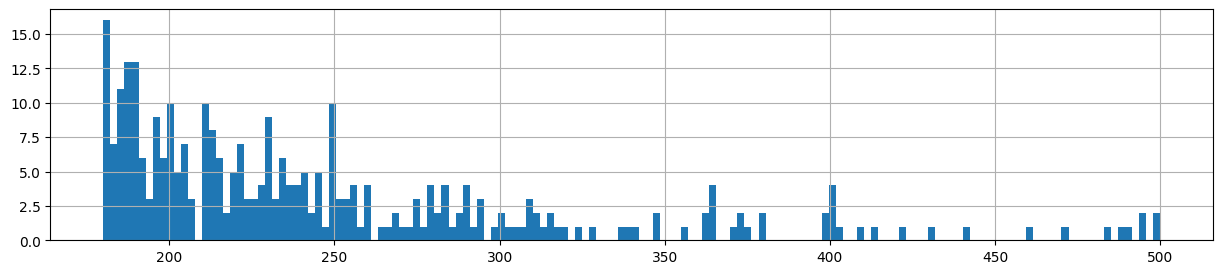

In [ ]:
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

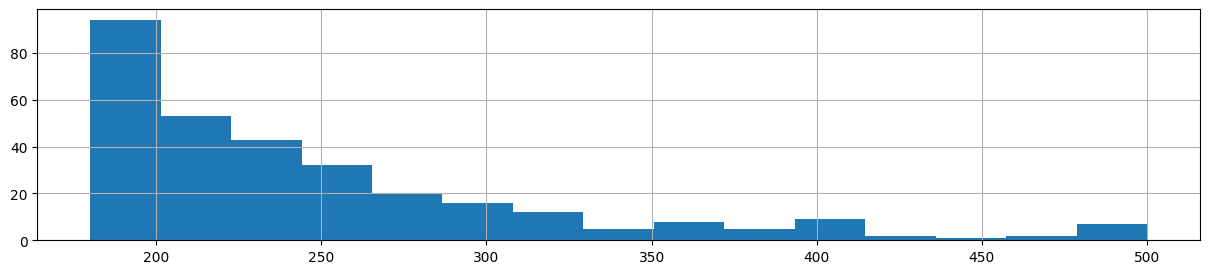

In [ ]:
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

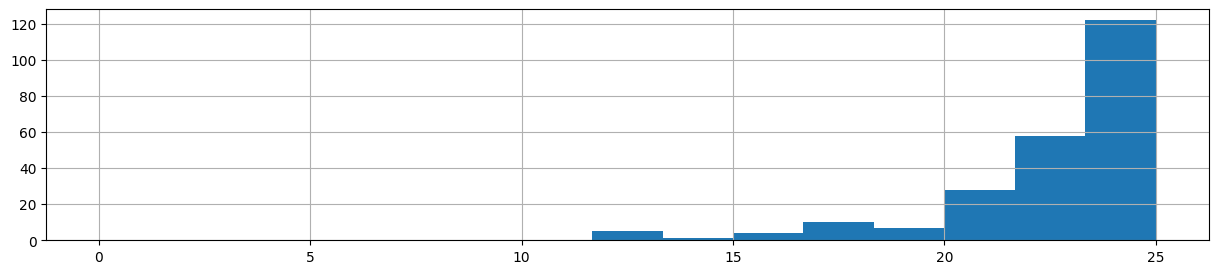

In [ ]:
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

* После детального анализа были найдены и устранены редкие и выбивающиеся значения.

In [ ]:
# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,1.00,22.00,2.40,3.00,"1,070,000.00",11.00,4.00,1.00,2.00
0.010000,1.00,28.00,2.50,4.00,"1,300,000.00",13.70,5.00,1.00,2.00
0.500000,2.00,52.00,2.50,93.00,"4,600,000.00",30.00,9.10,4.00,9.00
0.990000,5.00,158.00,3.50,863.99,"25,339,200.00",95.00,24.01,22.00,26.00
0.998800,7.00,207.95,4.10,976.84,"47,700,000.00",131.14,28.53,26.00,27.00


Добавляем в таблицу новые столбцы со следующими параметрами:

- цена одного квадратного метра;

- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

- месяц публикации объявления;

- год публикации объявления;

- тип этажа квартиры (значения — «первый», «последний», «другой»);

- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).


Добавляем столбец со стоимостью 1 квадратного метра

In [ ]:
data['meter_price'] = data['last_price']/ data['total_area']
data['meter_price']

0        120370.370370
1         82920.792079
2         92785.714286
5         95065.789474
6         99195.710456
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: meter_price, Length: 22261, dtype: float64

Добавляем столбец с днем недели публикации ( где 0 это понедельник ,а 6 - воскресенье )

In [ ]:
data['publish_weekday'] = pd.to_datetime(data['first_day_exposition']).dt.weekday
data['publish_weekday']

0        3
1        1
2        3
5        0
6        3
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: publish_weekday, Length: 22261, dtype: int64

Добавляем столбец с месяцем публикации

In [ ]:
data['publish_month'] = pd.to_datetime(data['first_day_exposition']).dt.month
data['publish_month']

0         3
1        12
2         8
5         9
6        11
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: publish_month, Length: 22261, dtype: int64

Добавляем столбец с годом публикации

In [ ]:
data['publish_year'] = pd.to_datetime(data['first_day_exposition']).dt.year
data['publish_year']

0        2019
1        2018
2        2015
5        2018
6        2017
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: publish_year, Length: 22261, dtype: int64

Дибоавляем тип этажа квартиры (значения — «первый», «последний», «другой»)

In [ ]:
def name(row):
    floors_total = row['floors_total']
    floor = row['floor']

    if floor == floors_total and floor != 1:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

data['floor_type'] = data.apply(name, axis=1)
data['floor_type'].unique()



array(['другой', 'первый', 'последний'], dtype=object)

Добавляем столбец с расстоянием до центра города в километрах

In [ ]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000, 0)
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
5         NaN
6        19.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 22261, dtype: float64

### Проведите исследовательский анализ данных

In [ ]:
data['total_area'].hist(bins=100, range = (0, 300),figsize = (15,5))
data['total_area'].describe()

#### По построенной гистограмме видно, что в основном квартиры имеют площадь в диапазоне от 40 до 68 м2 (разброс между Q1 и Q3), а средняя площадь квартир равняется 58 м2, при этом медианным значением является только - 52 м2.

count    22261.000000
mean        32.996008
std         16.592743
min         10.080000
25%         19.000000
50%         30.000000
75%         40.900000
max        149.400000
Name: living_area, dtype: float64

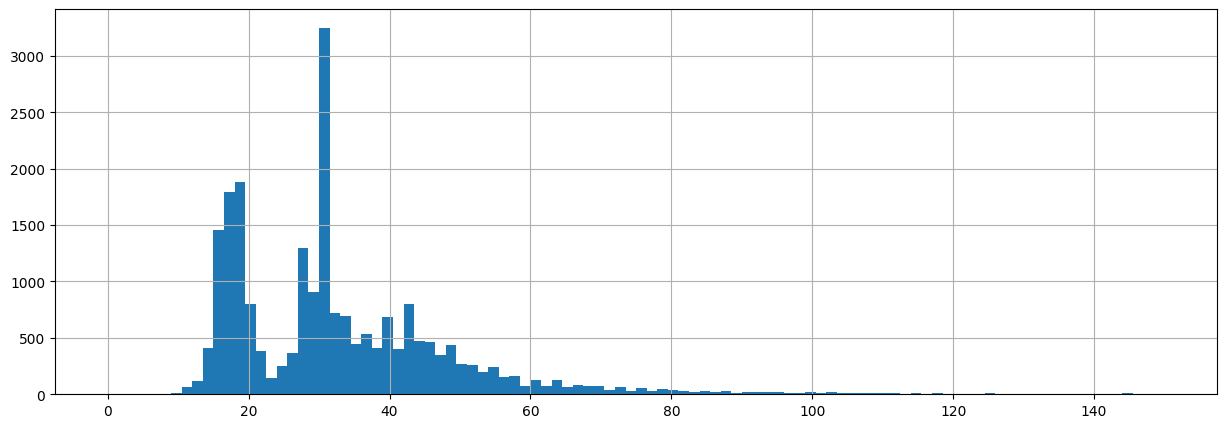

In [ ]:
data['living_area'].hist(bins=100, range = (0, 150), figsize = (15,5))
data['living_area'].describe()

### По построенной гистограмме видно, что в основном жилая площадь квартир имеет площадь в диапазоне от 19 до 41 м2 (разброс между Q1 и Q3), а средняя жилая площадь квартир равняется 33 м2, при этом медианным значением является только - 30 м2.

Рассмотрим площадь кухни

count    22261.000000
mean         9.898731
std          3.793210
min          3.200000
25%          7.200000
50%          9.100000
75%         11.100000
max         29.900000
Name: kitchen_area, dtype: float64

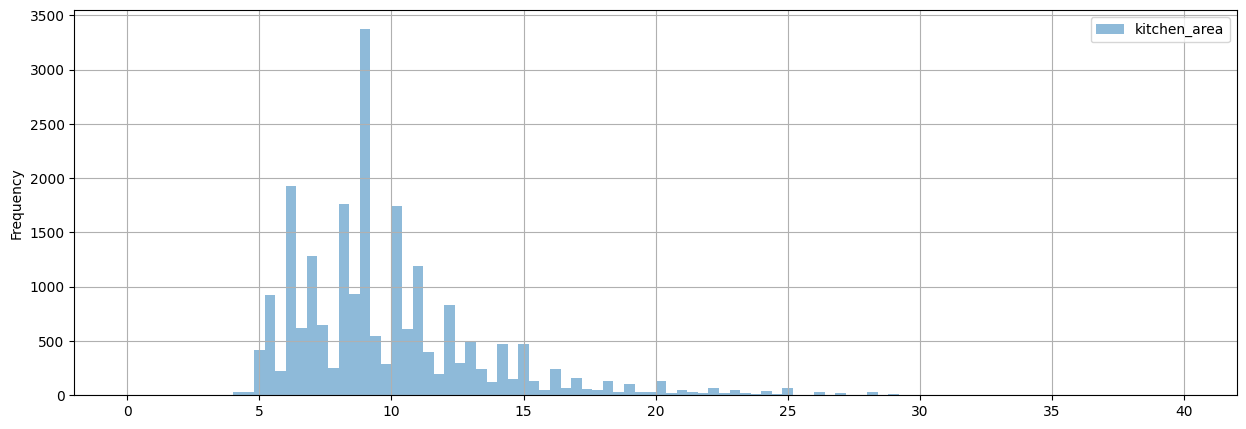

In [ ]:
data.plot(kind='hist',y='kitchen_area', bins=100, range = (0, 40), linewidth=5, alpha=0.5, label='kitchen_area', grid=True, legend=True, \
          figsize = (15,5))
data['kitchen_area'].describe()

#### По построенной гистограмме видно, что в основном площадь кухонь квартир имеет площадь в диапазоне от 7 до 11 м2 (разброс между Q1 и Q3), а средняя площадь кухни в квартирах равняется 10 м2, при этом медианным значением является только - 9 м2.

count    2.226100e+04
mean     5.828429e+06
std      4.549446e+06
min      1.010000e+06
25%      3.458944e+06
50%      4.600000e+06
75%      6.600000e+06
max      5.953489e+07
Name: last_price, dtype: float64

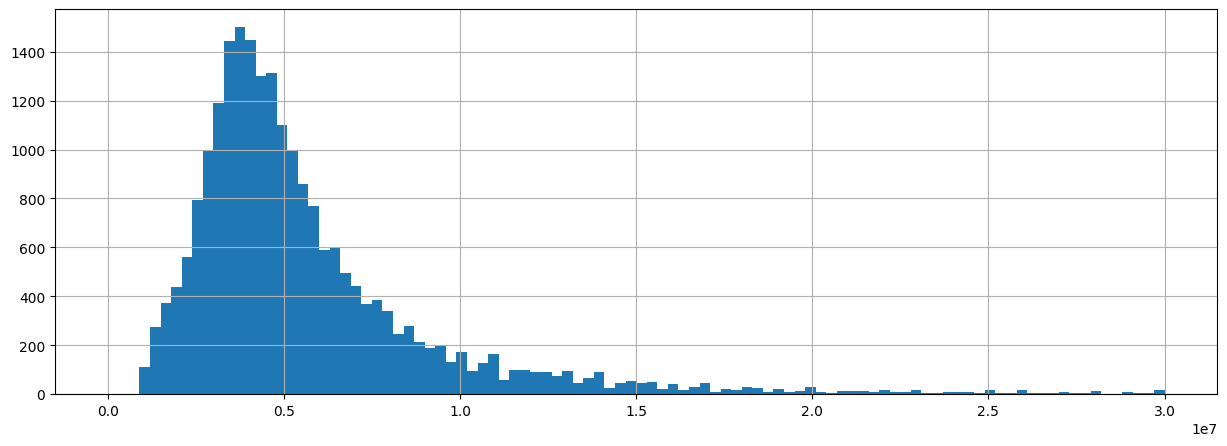

In [ ]:
#цена объекта
data['last_price'].hist(bins=100, range = (0, 30000000),figsize = (15,5))
data['last_price'].describe()

#### По построенной гистограмме видно, что в основном стоимость квартир в диапазоне от 3,45 до 6,6 млн р. (разброс между Q1 и Q3), а средняя стоимость квартир равняется 5,8 млн р., при этом медианным значением является  - 4,6 м2.

Рассмотим количество комнат

count    22261.000000
mean         2.048246
std          0.984018
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

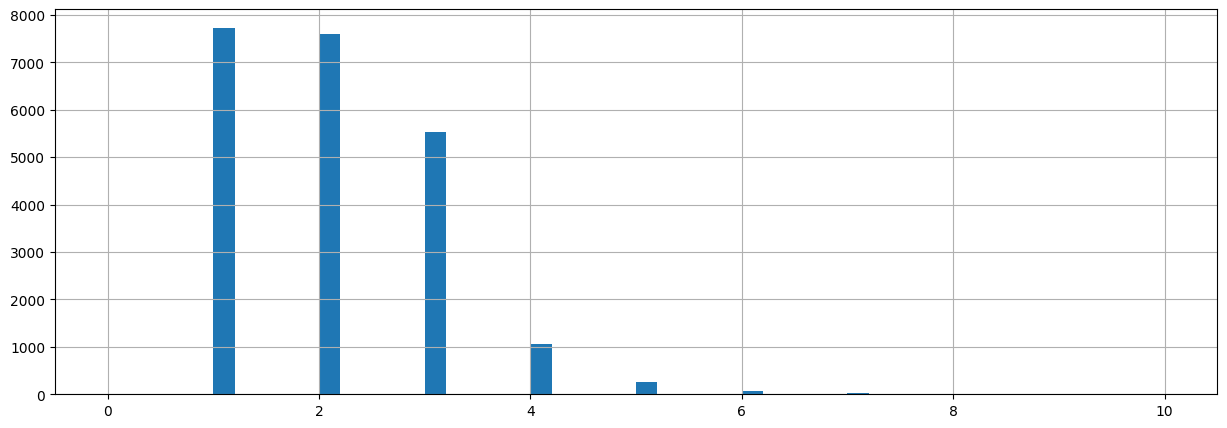

In [ ]:
data['rooms'].hist(bins=50, range = (0, 10),figsize = (15,5))
data['rooms'].describe()

#### По построенной гистограмме видно, что в основном количество комнат в квартирах находится в диапазоне от 1 до 3  (разброс между Q1 и Q3), а среднее количество комнат в квартирах равняется 2 , при этом медианным значением является  -2.

Рассмотрим высоту потолков

count    22261.000000
mean         2.632151
std          0.227611
min          2.200000
25%          2.500000
50%          2.500000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

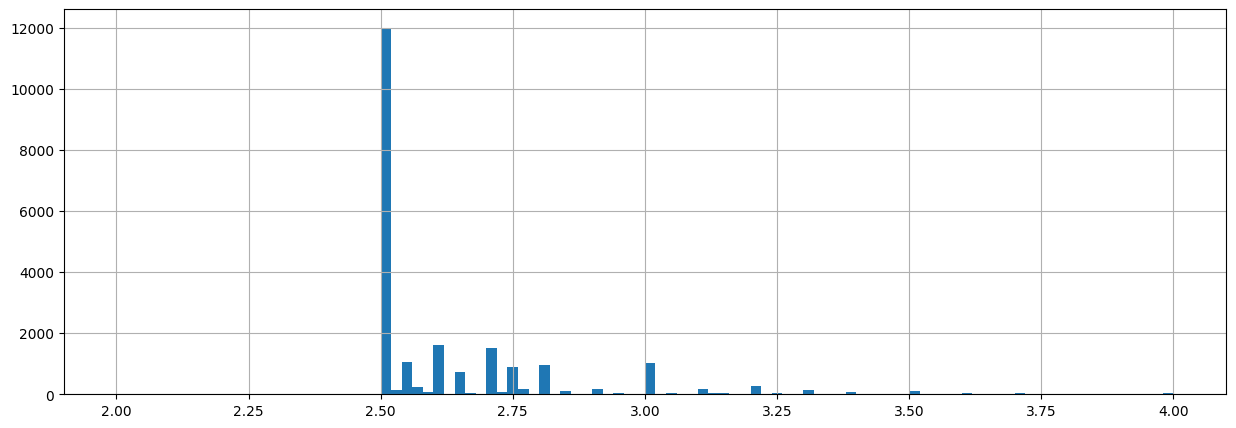

In [ ]:
data['ceiling_height'].hist(bins=100, range = (2, 4),figsize = (15,5))
data['ceiling_height'].describe()

#### По построенной гистограмме видно, что в основном высота поотолков в квартирах находится в диапазоне от 2,2 до 2,7  м (разброс между Q1 и Q3), а среднея высота поотолков в квартирах равняется 2,63 м, при этом медианным значением является - 2,5 м.

Рассмотрим этажи квартиры

count    22261.000000
mean         5.877364
std          4.841009
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

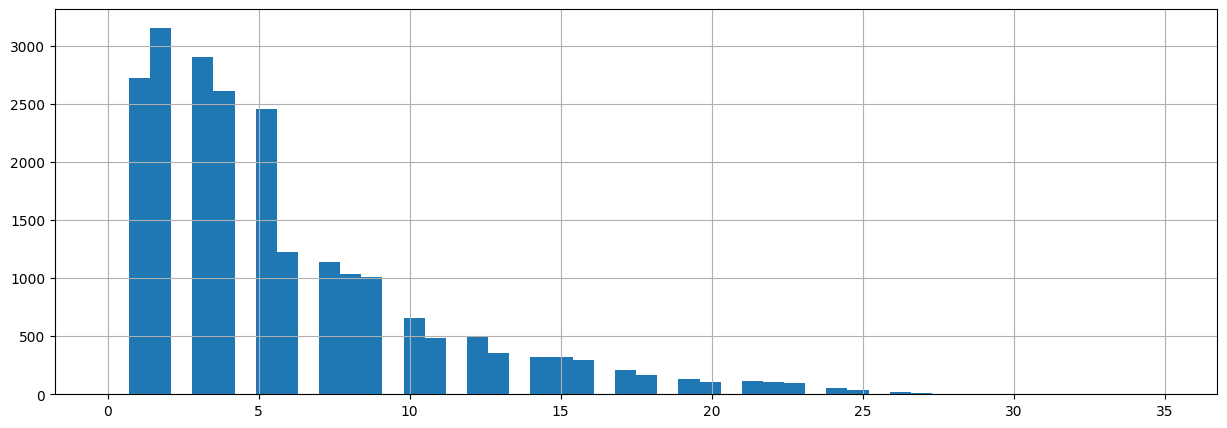

In [ ]:
data['floor'].hist(bins=50, range = (0, 35),figsize = (15,5))
data['floor'].describe()

#### По построенной гистограмме видно, что в основном этаж квартиры находится в диапазоне от 2 до 8  (разброс между Q1 и Q3), а средний этаж квартир равняется 5,9 , при этом медианным значением является - 4.

Тип этажа квартиры («первый», «последний», «другой»)

count      22261
unique         3
top       другой
freq       16450
Name: floor_type, dtype: object

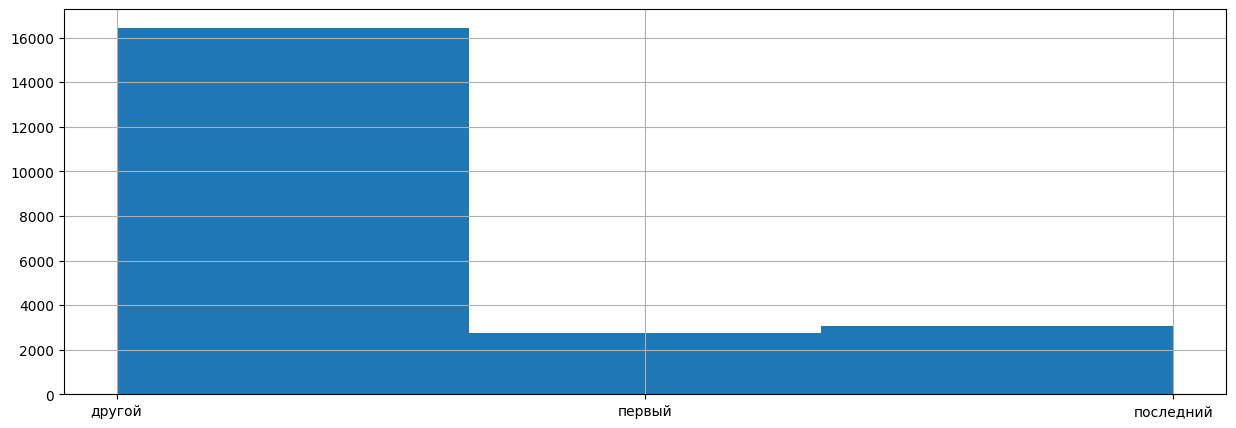

In [ ]:
data['floor_type'].hist(bins=3, range = (0, 2),figsize = (15,5))
data['floor_type'].describe()

#### По построенной гистограмме видно, что в основном  квартиры находятся на средних этажах.

Рассмотрим общее количество этажей в доме

count    22261.000000
mean        10.702170
std          6.514237
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

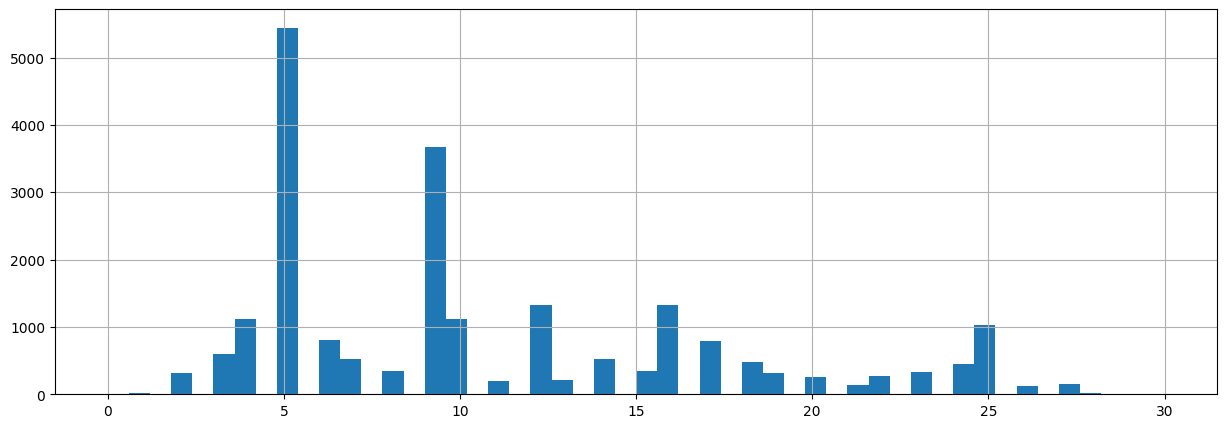

In [ ]:
data['floors_total'].hist(bins=50, range = (0, 30),figsize = (15,5))
data['floors_total'].describe()

#### По построенной гистограмме видно, что в основном общая высота домов находится в диапазоне от 5 до 16  (разброс между Q1 и Q3), а средняя высота домов равняется 11 , при этом медианным значением составляет - 9.

Рассмотрим расстояние до центра города в метрах

count    17161.000000
mean     14367.922557
std       8591.484861
min        181.000000
25%       9594.000000
50%      13211.000000
75%      16337.000000
max      65952.000000
Name: cityCenters_nearest, dtype: float64

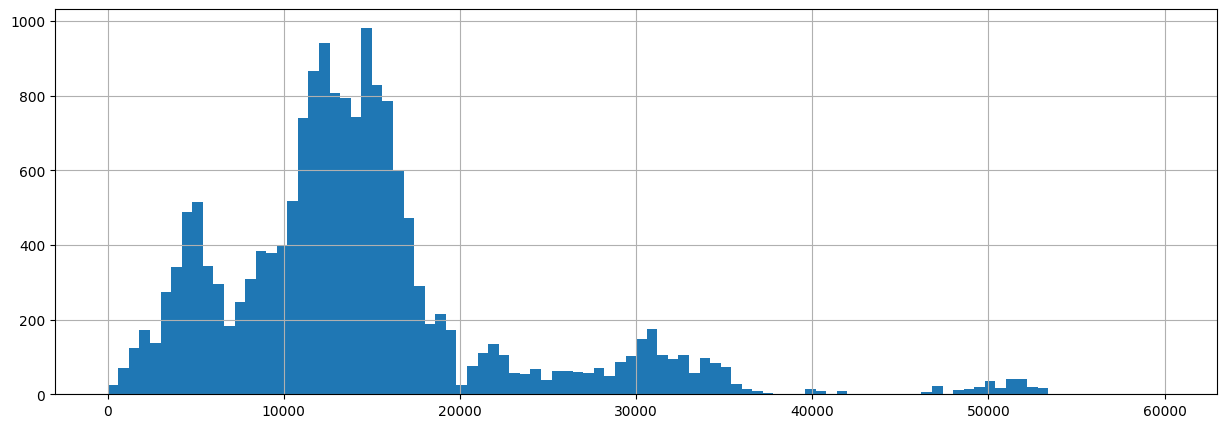

In [ ]:
data['cityCenters_nearest'].hist(bins=100, range = (0, 60000),figsize = (15,5))
data['cityCenters_nearest'].describe()

#### По построенной гистограмме видно, что в основном расстояние домов до центра города находится в диапазоне от 9594 до 16337 метров  (разброс между Q1 и Q3), а среднее расстояние до центра равняется 14367 метров , при этом медианным значением составляет - 13211 метров.

Рассмотрим расстояние до ближайшего аэропорта

count    17141.000000
mean     28857.738288
std      12724.194409
min          0.000000
25%      18446.000000
50%      26884.000000
75%      37407.000000
max      84853.000000
Name: airports_nearest, dtype: float64

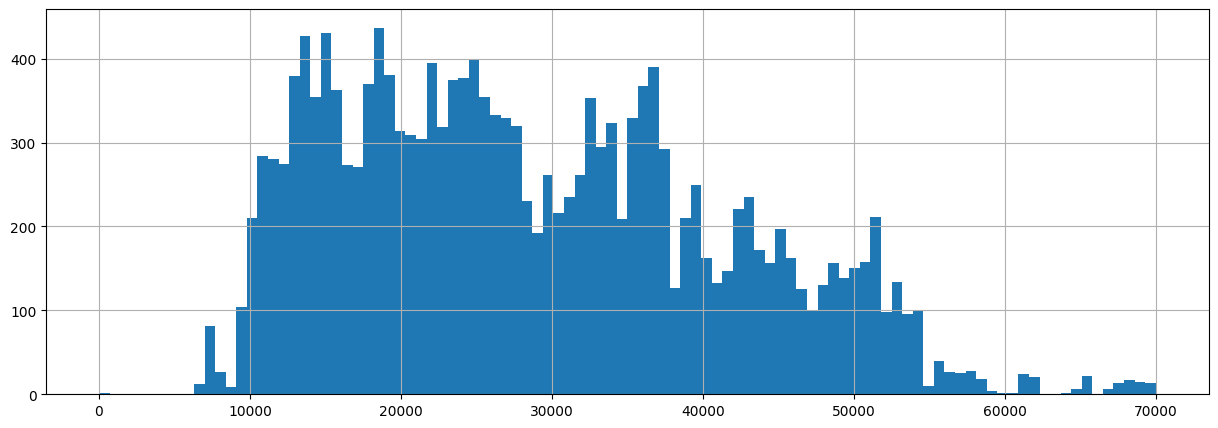

In [ ]:
data['airports_nearest'].hist(bins=100, range = (0, 70000),figsize = (15,5))
data['airports_nearest'].describe()

#### По построенной гистограмме видно, что в основном расстояние квартир до аэропорта города находится в диапазоне от 18446 до 37407 метров  (разброс между Q1 и Q3), а среднее расстояние до аэропорта равняется 28857 метра , при этом медианным значением составляет -26884 метров.

Рассмотрим расстояние до ближайшего парка

count    7546.000000
mean      491.375298
std       336.583451
min         1.000000
25%       289.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

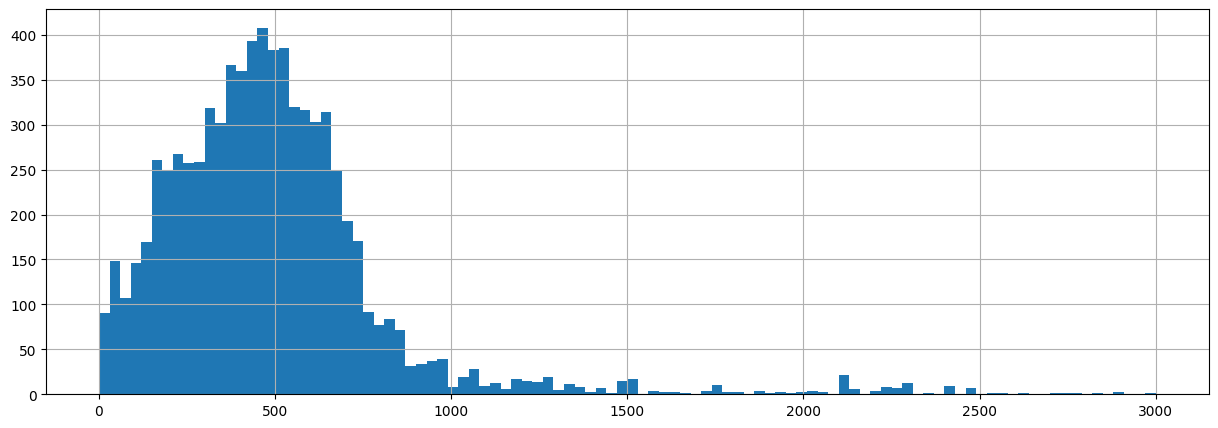

In [ ]:
data['parks_nearest'].hist(bins=100, range = (0, 3000),figsize = (15,5))
data['parks_nearest'].describe()

#### По построенной гистограмме видно, что в основном расстояние квартир до ближайшего парка находится в диапазоне от 289 до 613 метра  (разброс между Q1 и Q3), а среднее расстояние квартир до ближайшего парка равняется 491 метра , при этом медианным значением составляет - 456 метров.

Рассмотрим день публикации объявления

count    22261.000000
mean         2.566821
std          1.790108
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publish_weekday, dtype: float64

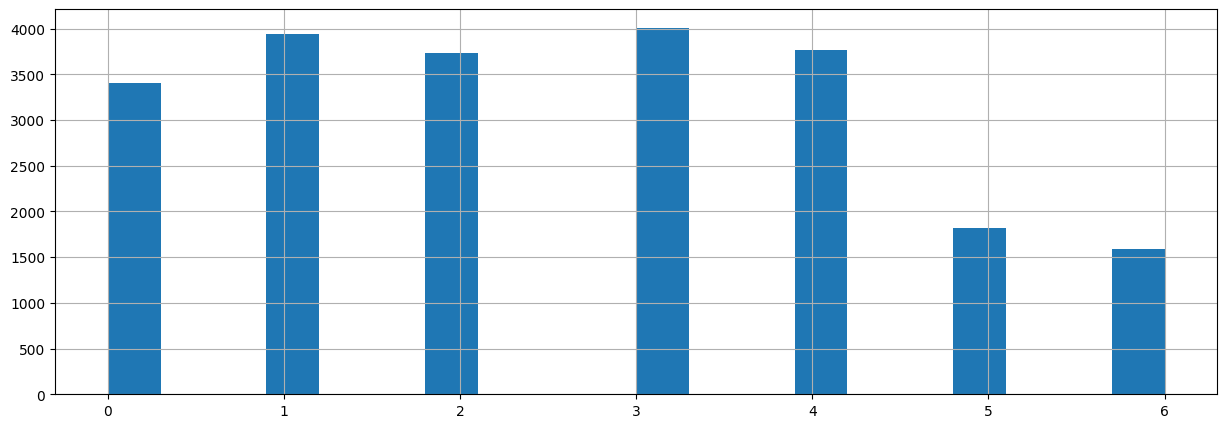

In [ ]:
data['publish_weekday'].hist(bins=20, range = (0, 6),figsize = (15,5))
data['publish_weekday'].describe()

#### По построенной гистограмме видно, что основные дни публикации обьявлений это будние дни, больше всего это во вторник и четверг, а меньше всего в воскресенье.

Рассмотрим месяц публикации объявления

count    22261.000000
mean         6.401375
std          3.487719
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publish_month, dtype: float64

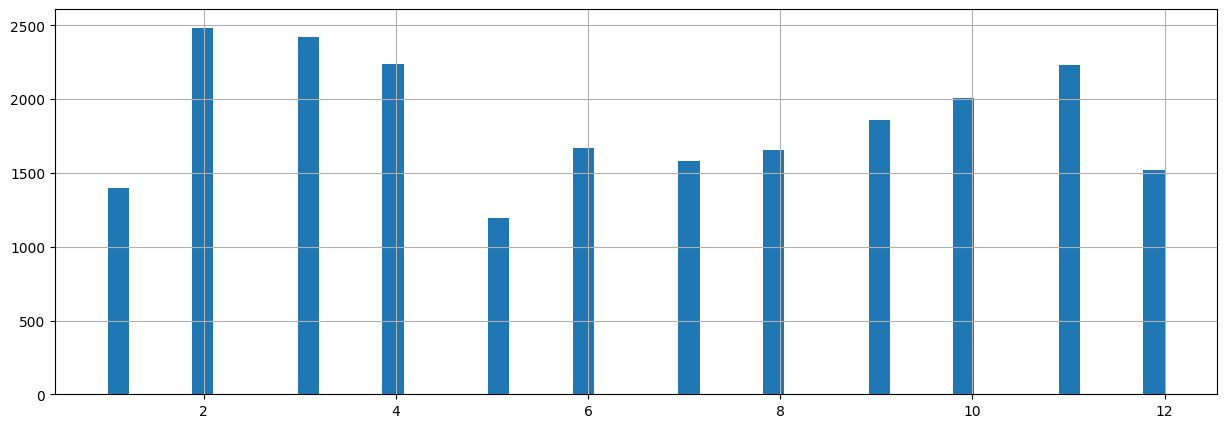

In [ ]:
data['publish_month'].hist(bins = 50, range = (1, 12),figsize = (15,5))
data['publish_month'].describe()

#### По построенной гистограмме видно, что наиболее активные месяцы публикаций обьявлений это февраль, март, апрель (начало года), наименьшее - в мае и декабре - население готовиться к дачному сезону и новому году соответственно. Начиная с весны до конца осени идет тенденция по увеличению публикаций. В феврале всплеск активности связан с отложеным спросом связанным с новогодними каникулами и самим новым годом , а также возможно с получением годовой премии.

Рассмотрим как быстро продавались квартиры

count    19302.000000
mean       166.506269
std        186.436879
min          3.000000
25%         44.000000
50%         93.000000
75%        220.000000
max        999.000000
Name: days_exposition, dtype: float64

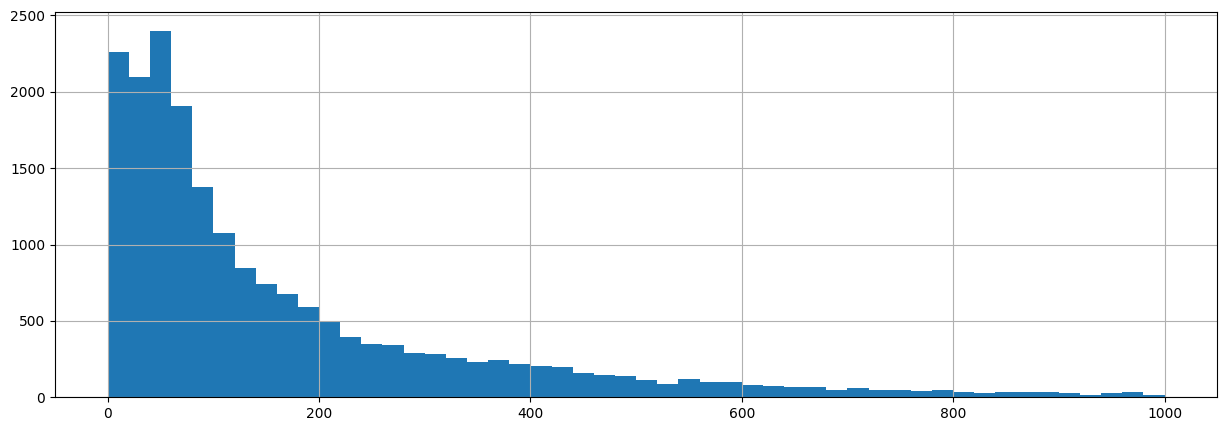

In [ ]:
data['days_exposition'].hist(bins = 50, range = (0, 1000),figsize = (15,5))
data['days_exposition'].describe()

#### По построенной гистограмме видно, что в основном длительность продажи квартир находится в диапазоне от 44 до 220 дней  (разброс между Q1 и Q3), а средняя длительность продажи квартир равняется 167 дней , при этом медианным значением составляет - 93 дней. При это некоторые особо ликвидные квартиры продавались менее чем за 1 день, а особо неликвидные "висят" в объявлениях более 2 лет.

Рассмотрим скорость продажи квартир по годам

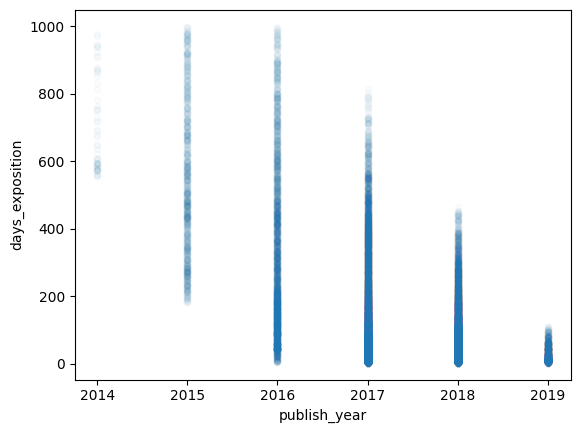

In [ ]:
data.plot(x='publish_year', y='days_exposition', kind='scatter',alpha=0.02);

На протяжении 5 лет с каждым годом скорость продаж увеличивалась, возможно было вызвано околонулевыми ставками кредитов и субсидиями.  

# Анализ факторов которые больше всего влияют на общую (полную) стоимость объекта

Анализ зависимоти цены от общей площади при продаже

Коэффициент корреляции Пирсона между параметрами равняется : 0.7537071345367157


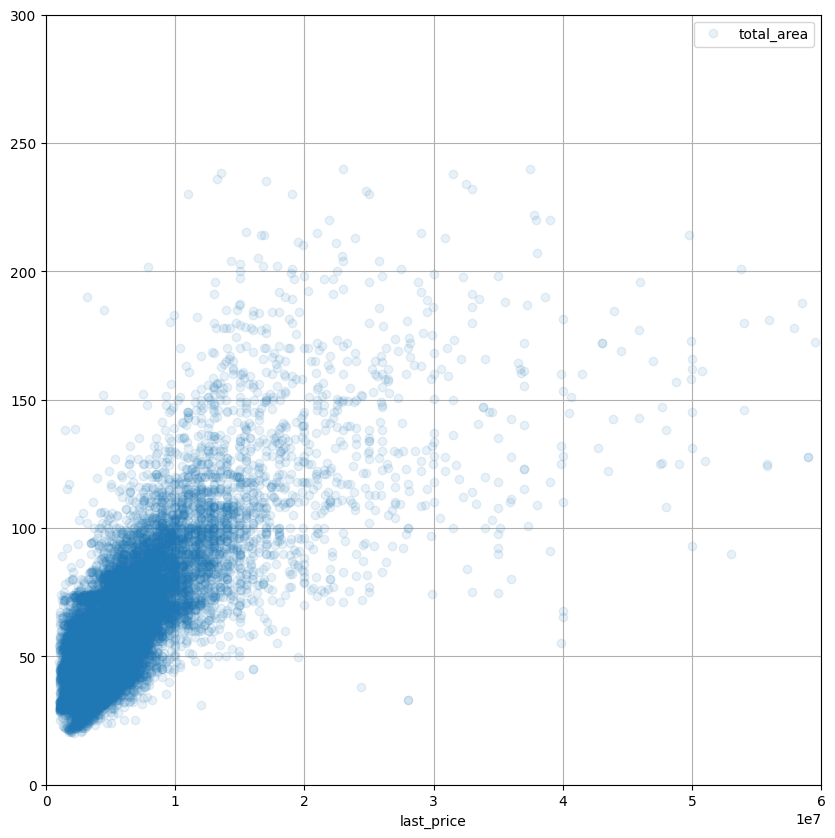

In [ ]:
data.plot(x = 'last_price', y = 'total_area',alpha=0.1, style = 'o', xlim = (0,60000000), ylim = (0,300), figsize = (10,10),
          grid = True)
print('Коэффициент корреляции Пирсона между параметрами равняется :', data['last_price'].corr(data['total_area']))

* Из графика видно, что стоимость квартиры напрямую зависит от площади квартиры

Анализ зависимости цены от жилой площади

Коэффициент корреляции Пирсона между параметрами равняется : 0.6219682573962632


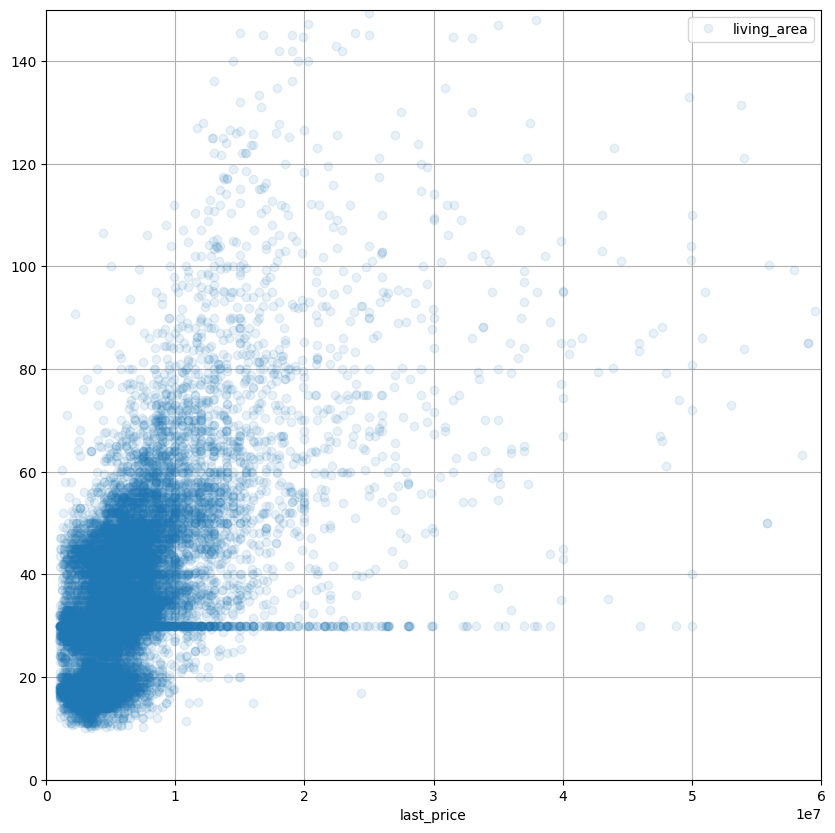

In [ ]:
data.plot(x = 'last_price', y = 'living_area',alpha=0.1, style = 'o', xlim = (0,60000000), ylim = (0,150), figsize = (10,10),
          grid = True)
print('Коэффициент корреляции Пирсона между параметрами равняется :', data['last_price'].corr(data['living_area']))

* Из графика видно, что стоимость квартиры напрямую зависит от жилой площади квартиры

Анализ зависимости цены от площади кухни

Коэффициент корреляции Пирсона между параметрами равняется : 0.5024367033402711


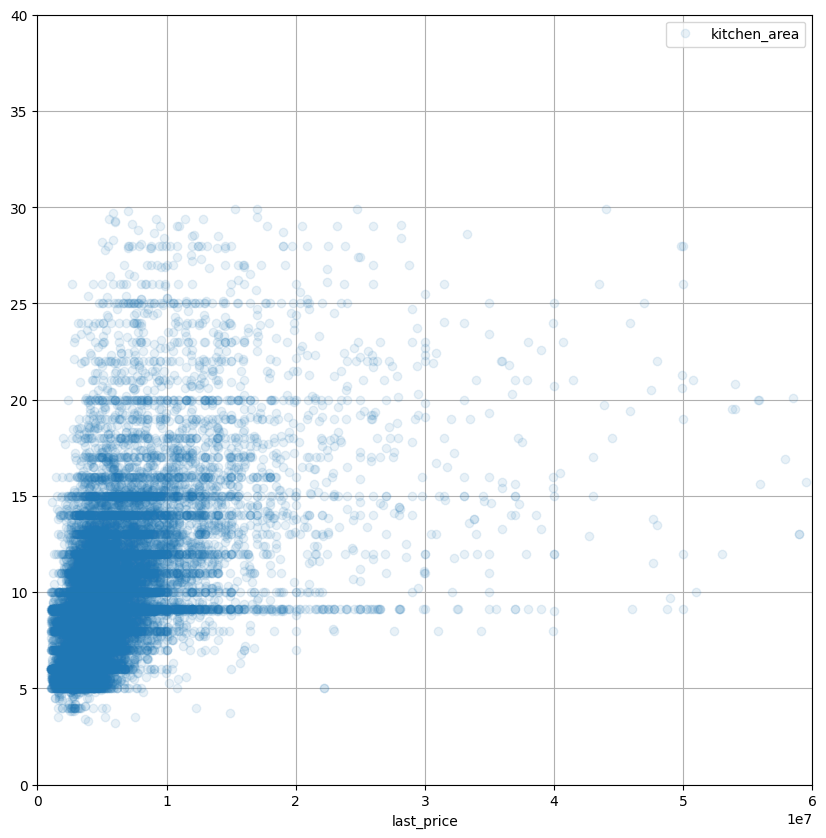

In [ ]:
data.plot(x = 'last_price', y = 'kitchen_area', alpha=0.1, style = 'o', xlim = (0,60000000), ylim = (0,40), figsize = (10,10),
          grid = True)
print('Коэффициент корреляции Пирсона между параметрами равняется :', data['last_price'].corr(data['kitchen_area']))

* Из графика видно, что на стоимость квартиры влияет площадь кухни , но уже не так существенно как площадь самой квартиры.

Анализ зависимости цены от количества комнат

,last_price
rooms,
1,3.858378e+06
2,5.457996e+06
3,7.531447e+06
4,1.082775e+07
5,1.493899e+07
6,1.625677e+07
7,1.862148e+07
8,1.939667e+07
9,1.700000e+07


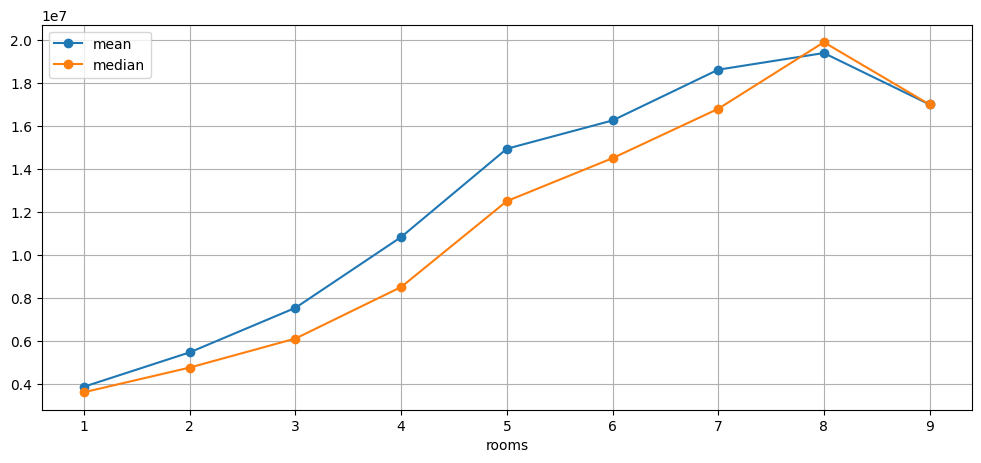

In [ ]:
data_pivot_price_rooms = data.pivot_table(index = 'rooms', values = 'last_price')
data.pivot_table(index='rooms', values='last_price',
                 aggfunc= ('mean','median')).plot(style='o-',grid=True, figsize=(12, 5));
data_pivot_price_rooms


* Из графика видно, что на стоимость квартиры влияет количество комнат, чем их больше тем больше стоимость и самой квартиры.

Анализ зависимости цены от даты размещения (год)

,last_price
publish_year,
2014,9.826726e+06
2015,6.728499e+06
2016,5.972022e+06
2017,5.751854e+06
2018,5.608776e+06
2019,6.139213e+06


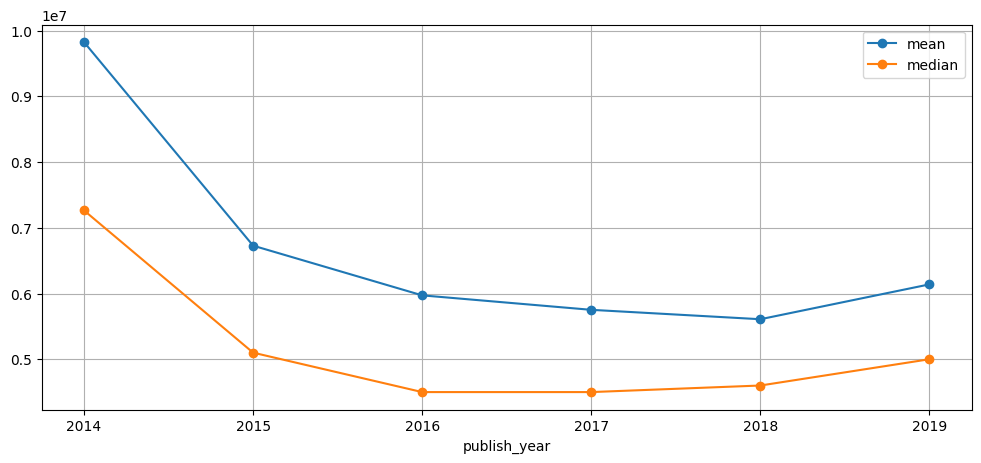

In [ ]:
data_pivot_price_year = data.pivot_table(index = 'publish_year', values = 'last_price')
data.pivot_table(index='publish_year', values='last_price',
                 aggfunc= ('mean','median')).plot(style='o-',grid=True, figsize=(12, 5));
data_pivot_price_year


* Из графика видно, что с каждым годом размещения обьявлений  стоимость квартир падает.

Анализ взаимного влияния параметров: кол-во записей и изменение средней цены и средней площади в течение лет)

,last_price
publish_year,
2014,79
2015,928
2016,2628
2017,7787
2018,8108
2019,2731


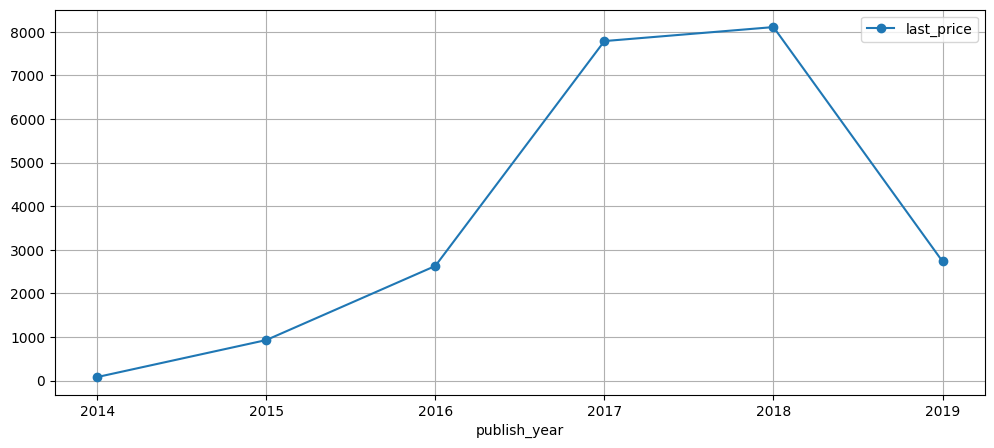

In [ ]:
data.pivot_table(index='publish_year', values='last_price',
                 aggfunc= ('count')).plot(style='o-',grid=True, figsize=(12, 5));
data.pivot_table(index='publish_year', values='last_price',
                 aggfunc= ('count'))

Анализ взаимного влияния параметров: кол-во записей и изменение средней цены и средней площади в течение лет)

,total_area
publish_year,
2014,80.287975
2015,65.166692
2016,59.553729
2017,58.175048
2018,56.420201
2019,56.833120


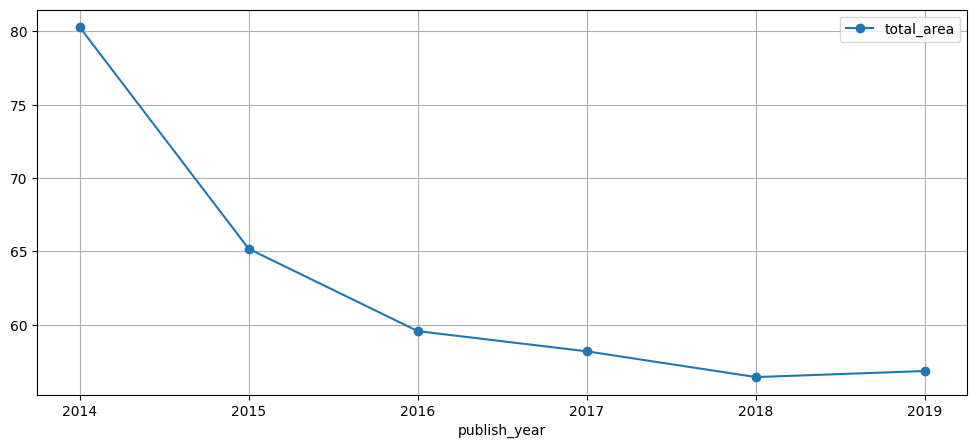

In [ ]:
data.pivot_table(index='publish_year', values='total_area',
                 aggfunc= ('mean')).plot(style='o-',grid=True, figsize=(12, 5));
data.pivot_table(index='publish_year', values='total_area',
                 aggfunc= ('mean'))

- Графики показвают, что с годами средняя площадь продаваемых квартир сильно уменьшилась. Что в свою очередь объясняет,
почему снижается средняя стоимость квартир по годам.
- Также можно сделать вывод, что кол-во обьявлений также растет по годам, в 2019 еще не собрана вся информация
(на момент получения данных год не закончился). А в 2014 было минимальное кол-во обьявлений,
видимо в этом году сервис яндекс.недвижимость только появился.
- Поэтому при анализе первый и последний год в исследований можем не учитывать, либо учитывать с учем оговоренного.

Анализ зависимости цены от этажа, на котором расположена квартира (первый, последний, другой)

<ipython-input-202-de3fefbf43a5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('floor_type').mean().plot(y='last_price', kind='bar');


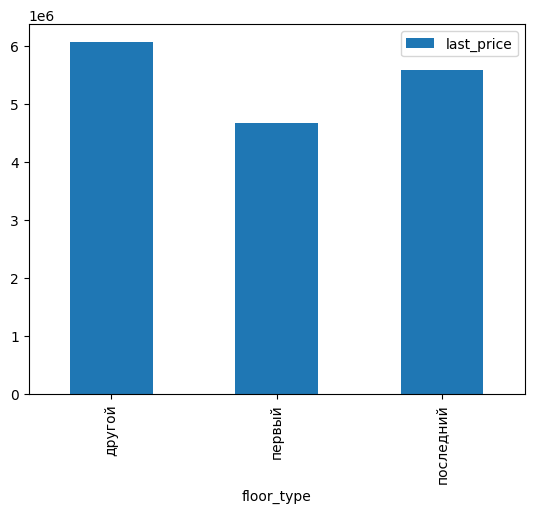

In [ ]:
data.groupby('floor_type').mean().plot(y='last_price', kind='bar');

* Из графика видно, что этаж квартиры влияет на стоимость квартиры, крайние этажи стоят дешевле, чем серединные, а первый цениться меньше всего.

Анализ зависимости цены от даты размещения (месяц)

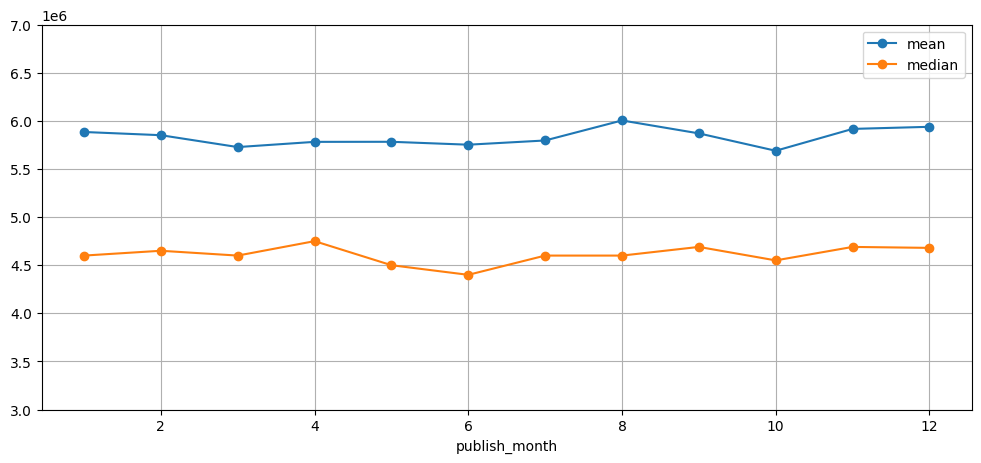

In [ ]:
data_pivot_price_month = data.pivot_table(index = 'last_price', values = 'publish_month')
data.pivot_table(index='publish_month', values='last_price',
                 aggfunc= ('mean','median')).plot(style='o-',grid=True, ylim=(3000000, 7000000),figsize=(12, 5));

* Из графика видно, что месяц размещения обьявления практически не влияет на стоимость квартиры. Можно выделиить едва заметную
зависимость, что весной и летом цена квартиры немного уменьшается.

Анализ зависимости цены от даты размещения (день недели)

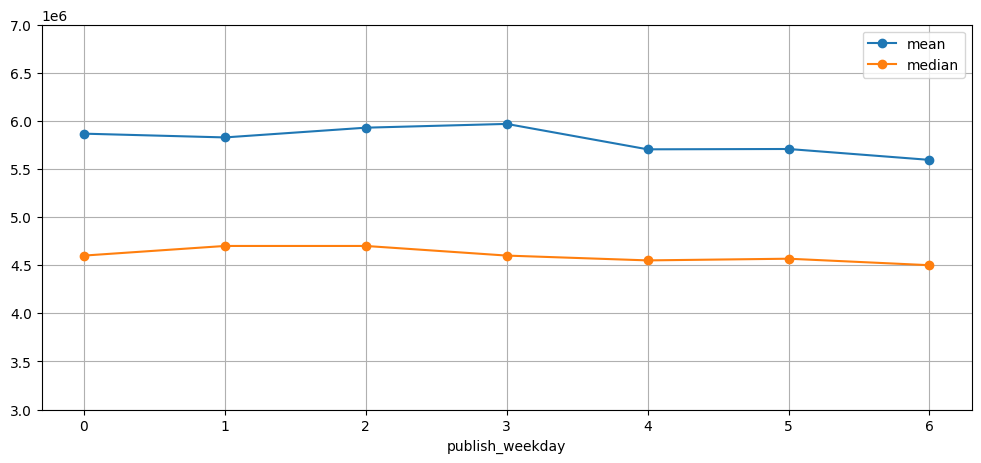

In [ ]:
data_pivot_price_weekday = data.pivot_table(index = 'last_price', values = 'publish_weekday')
data.pivot_table(index='publish_weekday', values='last_price',
                 aggfunc= ('mean','median')).plot(style='o-',grid=True, ylim=(3000000, 7000000),figsize=(12, 5));

* Из графика видно, что день недели размещения обьявления практически не влияет на стоимость квартиры, есть неболшая тенденция к
снижению средней стоимости в выходные.

# Анализ средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [ ]:
sorted_data = data.groupby('locality_name').count()
sorted_data['meter_price'].sort_values(ascending=False).head(10)

locality_name
Санкт-Петербург      14773
посёлок Мурино         482
посёлок Шушары         429
Всеволожск             382
Пушкин                 348
Колпино                335
посёлок Парголово      322
Гатчина                305
деревня Кудрово        276
Выборг                 226
Name: meter_price, dtype: int64

Определение средней стоимости кв. метра в 10 населённых пунктах с наибольшим числом объявлений

In [ ]:
grouped_data = data.groupby('locality_name').agg({'locality_name':['count'], 'meter_price' : ['mean']})
grouped_data.sort_values(by = ('locality_name', 'count'), ascending=False).head(10).style.format("{:,.1f}")

,locality_name,meter_price
,count,mean
locality_name,,
Санкт-Петербург,"14,773.0","111,367.8"
посёлок Мурино,482.0,"84,909.3"
посёлок Шушары,429.0,"78,288.6"
Всеволожск,382.0,"68,713.7"
Пушкин,348.0,"102,474.9"
Колпино,335.0,"75,279.7"
посёлок Парголово,322.0,"90,216.5"
Гатчина,305.0,"68,865.9"


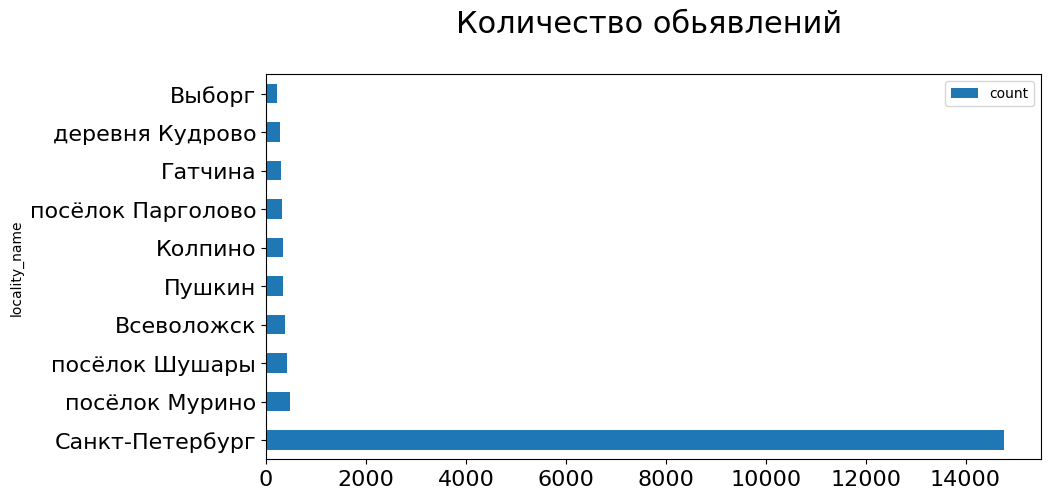

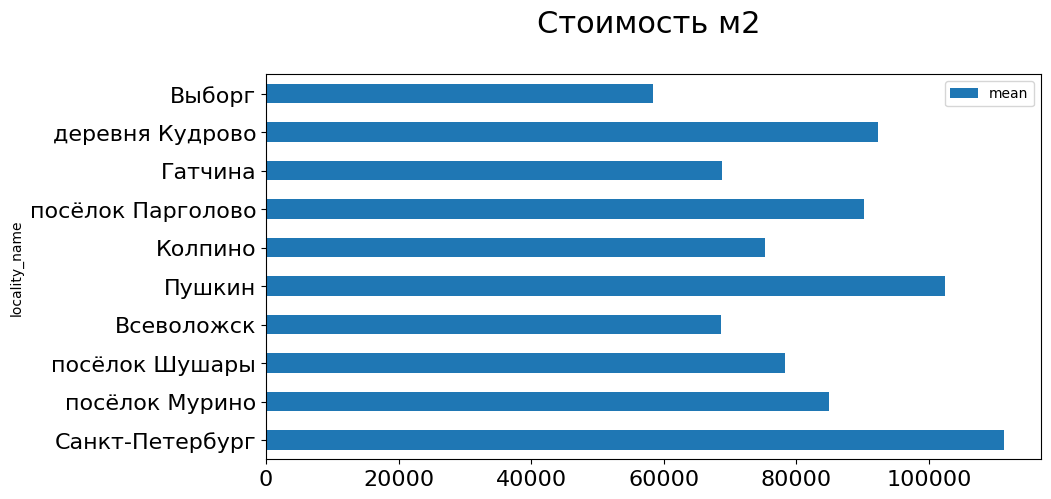

In [ ]:
grouped_data.sort_values(by = ('locality_name', 'count'), ascending=False).head(10).plot( y='locality_name', kind = 'barh',
    figsize = (10,5),rot = 0, legend = True, fontsize = 16).set_title('Количество обьявлений '
    + "\n", fontsize = 22);
grouped_data.sort_values(by = ('locality_name', 'count'), ascending=False).head(10).plot( y='meter_price', kind = 'barh',
    figsize = (10,5),rot = 0, legend = True, fontsize = 16).set_title('Стоимость м2 '
    + "\n", fontsize = 22);

Определение максимальной и минимальной средней стоимости кв. метра во всех населённых пунктах

In [ ]:
grouped_data = data.groupby('locality_name').agg({'locality_name':['count'], 'meter_price' : ['mean']})
grouped_data.sort_values(by = ('meter_price', 'mean'), ascending=False)

,locality_name,meter_price
,count,mean
locality_name,,
посёлок Лисий Нос,1,168706.697460
Зеленогорск,24,115122.799198
Санкт-Петербург,14773,111367.839085
деревня Бор,1,105539.261570
Пушкин,348,102474.944906
...,...,...
поселок Оредеж,1,19877.675841
Бокситогорск,2,19600.140713


* Наибольшая цена м2 в посёлке Лисий Нос = 121 т.р, а наименьшая цена в деревне Старополье = 11 т.р.

# Анализ изменения средней цены каждого километр от центра Санкт - Петербурга

Средняя цена каждого километра

In [ ]:
data.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_nearest_km').agg({'last_price' : ['mean']})

,last_price
,mean
cityCenters_nearest_km,
0.0,1.655153e+07
1.0,1.200610e+07
2.0,1.220567e+07
3.0,9.938061e+06
4.0,1.063423e+07
5.0,1.102832e+07
6.0,1.113545e+07
7.0,1.160060e+07


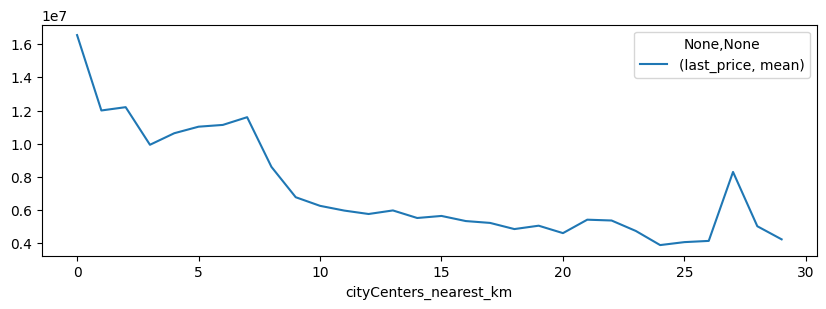

In [ ]:
data.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_nearest_km').agg({'last_price' : ['mean']}).plot(figsize = (10,3));

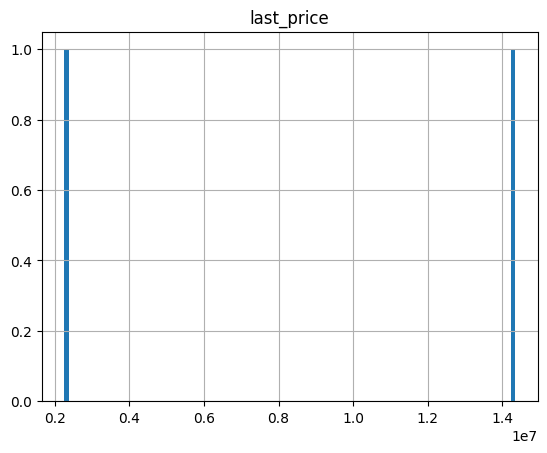

In [ ]:
data.query('locality_name == "Санкт-Петербург"  and cityCenters_nearest_km == 27.0').hist('last_price', bins = 100);

In [ ]:
pd.set_option('display.max_columns', None)
data.query('locality_name == "Санкт-Петербург"  and cityCenters_nearest_km == 27.0')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_locality_name,meter_price,publish_weekday,publish_month,publish_year,floor_type,cityCenters_nearest_km
748,13,14350000.0,74.0,2017-11-28T00:00:00,2,3.13,5,30.0,3,False,False,False,25.0,0,Санкт-Петербург,23888.0,27313.0,1.0,1496.0,0.0,NaN,128.0,санкт-петербург,193918.918919,1,11,2017,другой,27.0
5961,6,2250000.0,32.0,2018-02-27T00:00:00,1,2.50,2,16.5,2,False,False,False,7.0,0,Санкт-Петербург,24006.0,27431.0,0.0,NaN,0.0,NaN,178.0,санкт-петербург,70312.500000,1,2,2018,последний,27.0


* Для того чтобы понять почему существует всплекс на 27 километре были изучены данные подробнее, выяснилость,
что средняя стоимость 27 километра значительно возрасла потому что в обьвлениях продается  обьект
стоимостью 14,35 млн .р, что в 2 раза выше рыночной цены для этих километров, что и послужило причиной локального пика на графике.

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22261 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total_images            22261 non-null  int64  
 1   last_price              22261 non-null  float64
 2   total_area              22261 non-null  float64
 3   first_day_exposition    22261 non-null  object 
 4   rooms                   22261 non-null  int64  
 5   ceiling_height          22261 non-null  float64
 6   floors_total            22261 non-null  int64  
 7   living_area             22261 non-null  float64
 8   floor                   22261 non-null  int64  
 9   is_apartment            22261 non-null  bool   
 10  studio                  22261 non-null  bool   
 11  open_plan               22261 non-null  bool   
 12  kitchen_area            22261 non-null  float64
 13  balcony                 22261 non-null  int64  
 14  locality_name           22261 non-null

Рассмотрим количество обьявлений на 3 км по каждому типу

In [ ]:
data.query('cityCenters_nearest_km == 3.0').groupby('floor_type').agg({'last_price' : ['count']})


,last_price
,count
floor_type,
другой,194
первый,52
последний,74


Общее количество объявлений на 3 км

In [ ]:
data.query('cityCenters_nearest_km == 3.0').agg({'last_price' : ['count']})

,last_price
count,320


Доля обьявлений на 3 км по каждому типу

In [ ]:
data.query('cityCenters_nearest_km == 3.0').groupby('floor_type').agg({'last_price' : ['count']}) /234

,last_price
,count
floor_type,
другой,0.829060
первый,0.222222
последний,0.316239


Количество обьявлений на 3 км по каждому типу

In [ ]:
data.query('cityCenters_nearest_km == 5.0').groupby('floor_type').agg({'last_price' : ['count']})

,last_price
,count
floor_type,
другой,606
первый,75
последний,122


Общее кол-во обьявлений на 5 км

In [ ]:
data.query('cityCenters_nearest_km == 5.0').agg({'last_price' : ['count']})

,last_price
count,803


Доля обьявлений на 5 км по каждому типу

In [ ]:
data.query('cityCenters_nearest_km == 5.0').groupby('floor_type').agg({'last_price' : ['count']}) /602

,last_price
,count
floor_type,
другой,1.006645
первый,0.124585
последний,0.202658


- Изучив данные можно сказать, что чем дальше от центра тем дешевле стоимость м2. Резкое снижение стоимости начинается с 7 по 10  км , что логично объснимо - граница города , начинаются поселки и спальные районы.
- Для того чтобы понять почему существует всплекс на 27 километре были изучены данные подробнее, выяснилость, что средняя стоимость 27 километра значительно возрасла потому что в обьвлениях продается обьект стоимостью 14,35 млн .р, что в 2 раза выше рыночной цены для этих километров, что и послужило причиной локального пика на графике.
- Если сравнить доли квартир на крайних этажах (первый и последний) на 3 и 5 км, то можно сделать вывод, что на 3 км доля квартир на крайних этажах (первый и последний) составляет значительную часть всех обьвлений - 42% (при 23 % на 5 км). Возможно именно этот фактор повлиял на снижение стоимости квартир на 3 километре.

<div style="border:2px solid Black; padding:20px;">

<h1>Общий вывод</h1>

Изучив данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет мы научились анализировать рыночную стоимость объектов недвижимости и получили интересные выводы по рынку недвижимости г. Санкт-Петербург и самой работе по анализу данных.
Далее будут описаны последовательно основные выводы которые были сделаны в ходе исследования:

1. В процессе предобработке данных были выявлены параметры с пропусками, далее они были проранжированы по их количеству. Далее был выполнен их анализ на предмет возможности заполнения данных пропусков, по части параметров такая замена видится вполнене приемлемым решением в текущей ситуации, по части параметров было принято решение воздержаться от замены пропусков во избежание внесения некорректных данных и как следсвие получение неверных выводов по анализу в целом.Часть пропущенных значений были заполнены там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Где логичную замену предложить было невозможно, то данные значения остались пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.


2. Касательно возможных причин пропусков то ими могут быть как нежелание респрондентов заполнять все поля анкеты, либо непонимания того, что от них требуется. Например, вопрос "это апартмент?" вызвал много вопрос что считать за апртмент, а что нет, для людей не посвященных этот  относительного новый тип жилью большинству не известен. Вторая причина почему остались поля незаполненными может быть незнание расстояния до аэропорта или ближайшего парка , поэтому такая информация также не заполнялась и тд.  


3. После изучения данных было выяснено, что часть данных относится к некорректному типу данных, все данные параметры должны быть отнесены к численному типу Int и Float. Что и было исправлено далее.


4. После анализа в столбце ceiling_height были выявлены аномальные значения в высоте потолков, там где была опечатка была произведена замена, а там где логичную замену произвести не получилось данные были отфильтрованы.


5. Далее после выполнения этапа предобработки данных были изучены все основные параметры объектов, такие как:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.


6. Далее были построены и проанализированны отдельные гистограммы для каждого из этих параметров.


7. По построенной гистограмме можно было сделать следующие выводы:
 - в основном квартиры имеют площадь в диапазоне от 40 до 70 м2 (разброс между Q1 и Q3), а средняя площадь квартир равняется 60 м2, при этом медианным значением является только - 52 м2.
 - в основном жилая площадь квартир имеет площадь в диапазоне от 19 до 41 м2 (разброс между Q1 и Q3), а средняя жилая площадь квартир равняется 34 м2, при этом медианным значением является только - 30 м2.
 - в основном площадь кухонь квартир имеет площадь в диапазоне от 7 до 11 м2 (разброс между Q1 и Q3), а средняя площадь кухни в квартирах равняется 10 м2, при этом медианным значением является только - 9 м2.
 - в основном стоимость квартир в диапазоне от 3,4 до 6,8 млн р. (разброс между Q1 и Q3), а средняя стоимость квартир равняется 2,36 млн р., при этом медианным значением является - 4,65 м2.
 - в основном количество комнат в квартирах находится в диапазоне от 1 до 3 (разброс между Q1 и Q3), а среднее количество комнат в квартирах равняется 2 , при этом медианным значением является -2.
 - в основном высота поотолков в квартирах находится в диапазоне от 2,5 до 2,7 м (разброс между Q1 и Q3), а среднея высота поотолков в квартирах равняется 2,63 м, при этом медианным значением является - 2,5 м.
 - в основном этаж квартиры находится в диапазоне от 2 до 8 (разброс между Q1 и Q3), а средний этаж квартир равняется 5,9 , при этом медианным значением является - 4.
 - в основном квартиры находятся на средних этажах.
 - в основном общая высота домов находится в диапазоне от 5 до 16 (разброс между Q1 и Q3), а средняя высота домов равняется 10 , при этом медианным значением составляет - 9.
 - в основном расстояние домов до центра города находится в диапазоне от 9238 до 16293 метров (разброс между Q1 и Q3), а среднее расстояние до центра равняется 14194 метров , при этом медианным значением составляет - 13101 метров.
 - в основном расстояние квартир до аэропорта города находится в диапазоне от 18582 до 37284 метров (разброс между Q1 и Q3), а среднее расстояние до аэропорта равняется 28796 метра , при этом медианным значением составляет - 26729 метров.
 - в основном расстояние квартир до ближайшего парка находится в диапазоне от 266 до 612 метра (разброс между Q1 и Q3), а среднее расстояние квартир до ближайшего парка равняется 490 метра , при этом медианным значением составляет - 455 метров.
 -  основные дни публикации обьявлений это будние дни, больше всего это во вторник и четверг, а меньше всего в воскресенье.
 -  наиболее активные месяцы публикаций обьявлений это февраль, март, апрель (начало года), наименьшее - в мае и декабре - население готовиться к дачному сезону и новому году соответственно. Начиная с весны до конца осени идет тенденция по увеличению публикаций.
 - в основном длительность продажи квартир находится в диапазоне от 45 до 232 дней (разброс между Q1 и Q3), а средняя длительность продажи квартир равняется 180 дней , при этом медианным значением составляет - 95 дней. При это некоторые особо ликвидные квартиры продавались менее чем за 1 день, а особо неликвидные "висят" в объявлениях по 5 лет.



8. Далее был выполнен анализ факторов которые больше всего влияют на общую (полную) стоимость объекта, исходя из которого можно сделать следующие выводы:
 - стоимость квартиры напрямую зависит от общей площади квартиры.
 - стоимость квартиры напрямую зависит от жилой площади квартиры.
 - на стоимость квартиры влияет площадь кухни , но уже не так существенно как площадь самой квартиры.
 - на стоимость квартиры влияет количество комнат, но уже не так существенно как площадь самой квартиры.
 - этаж квартиры влияет на стоимость квартиры по двум зависимостям: 1 - до 5 этажа - прямая зависимость возрастания цены, и 2 - с 5 этажа и выше - обратная зависимость стоимости квартиры от этажа.
 - день недели размещения обьявления не влияет на стоимость квартиры.
 - месяц размещения обьявления практически не влияет на стоимость квартиры. Можно выделить едва заметную зависимость, что летом цена квартиры немного уменьшается.
 - с каждым годом размещения обьявлений стоимость квартиры растет.


9. Далее был выполнен анализ средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, исходя из которого можно сделать следующие выводы:
 - в городе Санкт-Петербург средняя цена м2 = 114 т.р., а наибольшая цена м2 оказалась в посёлке Лисий Нос = 121 т.р, а наименьшая цена в деревне Старополье = 11 т.р.
 - изучив данные можно сказать, что чем дальше от центра тем дешевле стоимость м2. Также можно отметить небольшие всплески в цене в районе 7 км и 27 км от города - что может объясняться наличием элитных коттеджных поселков вблизи города.
 </div>
